## Project Name: Likelihood of Seeking Mental Health Treatment
## Project Rationale: In general, having a high level of mental wellness is important on any level (individual or at a workplace) as it directly affects one's emotional state, social perceptions and work productivity. However, survey results and other media outlets have suggested that many individuals potentially in need of mental healthcare are not receiving or even seeking appropriate treatments. This leads directly to the project goals as stated below.
### Project Goals:
### Data analysis and exploration:
- To identify significant factors which influences an individual's choice to seek professional mental care treatment.
- Based on factors identified, investigate the likely hurdles which prevent individuals from seeking necessary mental care treatment.
- Constructive suggestions can then be made to tackle root cause issues to increase uptake of professional mental care treatment by individuals who may require them.

### Train, Build and Deploy predictive analysis model:
- To profile an individual based on various inputs to determine likelihood of him/her to accept mental healthcare treatment from a professional based on the model's prediction results.

### Data Sources from <a href="https://osmihelp.org/" target="blank">Open Sourcing Mental Illness (OSMI)</a>
1. <a href="https://www.kaggle.com/osmihelp/osmi-mental-health-in-tech-survey-2018" target="blank">OSMI Mental Health in Tech Survey 2018</a>
2. <a href="https://www.kaggle.com/osmihelp/osmi-mental-health-in-tech-survey-2019" target="blank">OSMI Mental Health In Tech Survey 2019</a>
3. <a href="https://www.kaggle.com/osmihelp/osmi-2020-mental-health-in-tech-survey-results" target="blank">OSMI Mental Health In Tech Survey 2020</a>

### Execution of Project
<a href="#step_1" target="_parent"><b>Step 1</b>. Data Collection & Loading</a><br>
<a href="#step_2" target="_parent"><b>Step 2</b>. Data Preparation</a><br>
&nbsp;&nbsp;<a href="#step_2_1" target="_parent"><b>2.1</b>. Drop redundant columns & Standardise column values</a><br>
&nbsp;&nbsp;<a href="#step_2_2" target="_parent"><b>2.2</b>. Deal with missing data & Standardise data types</a><br>
&nbsp;&nbsp;<a href="#step_2_3" target="_parent"><b>2.3</b>. Standardise gender categories and generate age ranges</a><br>
&nbsp;&nbsp;<a href="#step_2_4" target="_parent"><b>2.4</b>. Encoding data (Encode from categorical to numeric)</a><br>
&nbsp;&nbsp;<a href="#step_2_5" target="_parent"><b>2.5</b>. Scaling and Fitting</a><br>
&nbsp;&nbsp;<a href="#step_2_6" target="_parent"><b>2.6</b>. Exploratory Data Analysis</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#step_2_6_1" target="_parent"><b>2.6.1</b>.Demographics Profiling</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#step_2_6_2" target="_parent"><b>2.6.2</b>.First Cut Analysis</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#step_2_6_3" target="_parent"><b>2.6.3</b>.Further Analysis</a><br>
<a href="#step_3" target="_parent"><b>Step 3</b>. Choosing a model</a><br>
<a href="#step_4" target="_parent"><b>Step 4</b>. Training the model & Hyperparameter Tuning</a><br>
&nbsp;&nbsp;<a href="#step_4_1" target="_parent"><b>4.1</b>. Logistic Regression</a><br>
&nbsp;&nbsp;<a href="#step_4_2" target="_parent"><b>4.2</b>. KNeighbors Classifier</a><br>
&nbsp;&nbsp;<a href="#step_4_3" target="_parent"><b>4.3</b>. Decision Tree Classifier</a><br>
&nbsp;&nbsp;<a href="#step_4_4" target="_parent"><b>4.4</b>. Random Forests</a><br>
&nbsp;&nbsp;<a href="#step_4_5" target="_parent"><b>4.5</b>. Bagging</a><br>
&nbsp;&nbsp;<a href="#step_4_6" target="_parent"><b>4.6</b>. Boosting</a><br>
&nbsp;&nbsp;<a href="#step_4_7" target="_parent"><b>4.7</b>. Stacking</a><br>
<a href="#step_5" target="_parent"><b>Step 5</b>. Evaluation</a><br>
<a href="#step_6" target="_parent"><b>Step 6</b>. Prediction</a>

<a id='step_1'></a>
### Step 1. Data Collection & Loading
- This step reads in all 3 input data files - survey responses from https://osmihelp.org/ from years <u>2018 through 2020</u>

In [1]:
# for data loading and transformation
import numpy as np 
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_colwidth", None)

# for data preparation and preprocessing for model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# to bypass warnings in the jupyter notebook
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=PendingDeprecationWarning)

In [2]:
# Use on available datasets
# Note: All datasets are stored in the data folder as survey_<year>.csv
years=[2018,2019,2020]
data_folder="data"

from IPython.display import display, HTML
for y in years:
    datafile="survey_"+str(y)+".csv"
    data = pd.read_csv(data_folder+"/"+datafile)
    print("\n########### Display all columns in datafile: "+datafile+" ###############")
    all_columns_df=pd.DataFrame({"Headers": list(data.columns)})
    display(HTML(all_columns_df.to_html(index=False)))
    print("\n#########################################################################")


########### Display all columns in datafile: survey_2018.csv ###############


Headers
#
<strong>Are you self-employed?</strong>
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Is your primary role within your company related to tech/IT?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided health coverage?
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"
Does your employer offer resources to learn more about mental health disorders and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?



#########################################################################

########### Display all columns in datafile: survey_2019.csv ###############


Headers
*Are you self-employed?*
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Is your primary role within your company related to tech/IT?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided health coverage?
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"
Does your employer offer resources to learn more about mental health disorders and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?"



#########################################################################

########### Display all columns in datafile: survey_2020.csv ###############


Headers
#
*Are you self-employed?*
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Is your primary role within your company related to tech/IT?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided health coverage?
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"
Does your employer offer resources to learn more about mental health disorders and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?



#########################################################################


- As shown above, header names i.e. the survey questions in each file are formatted either as HTML strings or contain special characters such as '*', '_' etc.
- To standardise the column names, in subsequent data cleaning steps, <b>column names shall all be transformed into non-html formatted text and read in lower case</b>
- After <b>sieving out relevant questions</b> from all the 3 data files, each question shall be renamed as such:

In [3]:
to_rename= {
    "are you self-employed?": "self_employed",
    "how many employees does your company or organization have?": "no_employees",
    "is your employer primarily a tech company/organization?": "tech_company",
    "is your primary role within your company related to tech/it?": "tech_role",
    "does your employer provide mental health benefits as part of healthcare coverage?": "benefits",
    "do you know the options for mental health care available under your employer-provided health coverage?": "care_options",
    "has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?": "welfare_program",
    "does your employer offer resources to learn more about mental health disorders and options for seeking help?": "seek_help",
    "is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?": "anonymity",
    "if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?": "leave",
    "would you feel more comfortable talking to your coworkers about your physical health or your mental health?": "mental_health_vs_phys_health",
    "would you feel comfortable discussing a mental health issue with your direct supervisor(s)?": "supervisor",
    "have you ever discussed your mental health with your employer?": "discussed_employer",
    "would you feel comfortable discussing a mental health issue with your coworkers?": "coworker",
    "have you ever discussed your mental health with coworkers?": "discussed_coworker",
    "have you ever had a coworker discuss their or another coworker's mental health with you?": "other_coworker",
    "overall, how much importance does your employer place on physical health?": "phys_health_importance",
    "overall, how much importance does your employer place on mental health?": "mental_health_importance",
    "do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?": "private_coverage",
    "do you know local or online resources to seek help for a mental health issue?": "resources",
    "if you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?": "business_contacts_diagnosis",
    "if you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?": "business_contacts_rel",
    "if you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?": "coworker_diagnosis",
    "if you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?": "coworker_rel",
    "do you believe your productivity is ever affected by a mental health issue?": "work_productivity",
    "if yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?": "work_time",
    "do you currently have a mental health disorder?": "current_disorder",
    "have you ever been diagnosed with a mental health disorder?": "diagnosed_disorder",
    "have you had a mental health disorder in the past?": "past_disorder",
    "have you ever sought treatment for a mental health disorder from a mental health professional?": "treatment",
    "do you have a family history of mental illness?": "family_history",
    "if you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?": "work_interfere_effective_treatment",
    "if you have a mental health disorder, how often do you feel that it interferes with your work when not being treated effectively (i.e., when you are experiencing symptoms)?": "work_interfere_non_effective_treatment",
    "have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?": "ob_consequence",
    "how willing would you be to share with friends and family that you have a mental illness?": "friends_family",
    "would you be willing to bring up a physical health issue with a potential employer in an interview?": "phys_health_interview",
    "would you bring up your mental health with a potential employer in an interview?": "mental_health_interview",
    "are you openly identified at work as a person with a mental health issue?": "openly_identified",
    "has being identified as a person with a mental health issue affected your career?": "affect_career",
    "overall, how well do you think the tech industry supports employees with mental health issues?": "tech_support",
    "what is your age?": "age",
    "what is your gender?": "gender",
    "what country do you live in?": "country_residence",
    "what us state or territory do you live in?": "state_residence",
    "what is your race?": "race",
    "what country do you work in?": "country_workplace",
    "what us state or territory do you work in?": "state_workplace"
}

<a id='step_2'></a>
### Step 2. Data Preparation
<a id="step_2_1"></a>
#### 2.1 Drop redundant columns & Standardise column values

In [4]:
def handle_column_names():
    from html.parser import HTMLParser
    class HTMLFilter(HTMLParser):
        text=""
        def handle_data(self, data):
            self.text += data

    def handle_html_str(col_name):
        html_filterer = HTMLFilter()
        html_filterer.feed(col_name)
        result=html_filterer.text
        result=result.replace("\n","")
        return result
    
    global df
    # sanitise column names
    df.columns=df.columns.astype(str)
    df.columns=[handle_html_str(x) for x in df.columns]
    df.columns=[x.lower() for x in df.columns]
    df.columns=[x.strip() for x in df.columns]
    df.columns=[x.replace("*","") for x in df.columns]
    df.columns=[x.replace("_","") for x in df.columns]
    
    # rename column names
    relevant_cols=list(to_rename.keys())
    df=df[relevant_cols]
    df.rename(columns=to_rename, inplace=True)

<a id="step_2_2"></a>
#### 2.2 Deal with missing data & Standardise data types
- Missing data shall have a placeholder "NaN"
- Float values will have a placeholder of -1.0 before being casted as an int of -1
- Boolean values are casted as str values
- Int values will have a placeholder of -1
- All str values shall have extra whitespaces at its start/end removed

In [5]:
# handle data types and missing values of columns
def handle_data_type():
    defaultInt = -1
    defaultString = "NaN"
    defaultFloat = -1.0
    
    global df
    for feature in df:
        dtype=df[feature].dtype
        if dtype=="int64":
            df[feature] = df[feature].fillna(defaultInt)
        elif dtype=="object":
            df[feature] = df[feature].fillna(defaultString)
        elif dtype=="float64":
            df[feature] = df[feature].fillna(defaultFloat)
        elif dtype=="bool":
            df[feature] = df[feature].apply(str)
            df[feature] = df[feature].fillna(defaultString)
        else:
            print("Error: Feature %s not recognized." % feature)
    df_float = df.select_dtypes(["float64"])
    df[df_float.columns] = df_float.apply(lambda x: x.astype("int64"))
    df_obj = df.select_dtypes(["object"])
    df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

- As self-employed individuals are the minority and not the main target group of the survey, the data shall exclude them
- Note that in the survey responses, values to represent "False" are: `0`, `No` or `False`

In [6]:
def exclude_self_employed():
    global df 
    
    df=df[(df["self_employed"]==0) |
          (df["self_employed"]=="False") |
          (df["self_employed"]=="No")]
    df.drop(["self_employed"],axis=1,inplace=True)
    
    # as a result, some of the columns are no longer relevant
    # other columns deemed as irrelevant are dropped as well
    df.drop(["tech_company","tech_role","discussed_employer","discussed_coworker",
             "other_coworker","private_coverage","resources","business_contacts_diagnosis",
             "business_contacts_rel","coworker_diagnosis","coworker_rel",
             "work_productivity","work_time","openly_identified","affect_career","race"],axis=1,inplace=True)
    df.reset_index(drop=True,inplace=True)

<a id="step_2_3"></a>
#### 2.3 Standardise gender categories and generate age ranges

- Note that for the `gender` field, objective is to group them into 3 categories: `male`, `female` and `nonbinary`
- As seen below, the survey had made this question open-ended, hence there is a need to compile the list of synonyms
- Answers not relevant to one's gender shall be in `the ignore list`

In [7]:
def categorise_gender():
    global df
    
    male=["cis-male","man",'let\'s keep it simple and say "male"',"male",
          "masculino","identify as male","cis male","swm","make","cisgender male",
          "male, born with xy chromosoms","masculine","m","cishet male","ostensibly male",
          "mostly male"]
  
    female=["femile","f","cisgender female","woman","*shrug emoji* (f)","femmina","cis-female",
            "female","cisgendered woman","cis woman","female (cisgender)","cis female","female (cis)",
            "i identify as female","female, she/her"]
    
    nonbinary=["she/her/they/them","non binary","genderqueer","demiguy","gender non-conforming woman",
               "nonbinary/femme","nonbinary","trans woman","agender trans woman","agender","trans female",
               "non-binary","trans man","female/gender non-binary.","nb","genderfluid","trans non-binary/genderfluid",
               "transgender","non-binary and gender fluid"]
    to_ignore_list=["43","nan","none","questioning","other"]

    df["gender"]=df["gender"].apply(str)
    df["gender"]=df["gender"].str.lower()
    df["gender"]=df["gender"].str.strip()

    for (row, col) in df.iterrows():
        if str.lower(col["gender"]) in male:
            df["gender"].replace(to_replace=col["gender"], value="male", inplace=True)
        if str.lower(col["gender"]) in female:
            df["gender"].replace(to_replace=col["gender"], value="female", inplace=True)
        if str.lower(col["gender"]) in nonbinary:
            df["gender"].replace(to_replace=col["gender"], value="nonbinary", inplace=True)          
    df=df[~df["gender"].isin(to_ignore_list)]

- Note that `age range` column shall depend on the upper limit and the lower limit of the column `age`
- Bins generated shall as such be more equally distributed and accommodate to values in the `age` column

In [8]:
def generate_age_range():
    import math
    def roundup(x):
        return int(math.ceil(x / 10.0))*10
    def rounddown(x):
        return int(math.floor(x / 10.0))*10
    global df
    #df=df[df["age"] > 15]
    s = pd.Series(df["age"])
    min_age=min(s)
    max_age=max(s)
    lower_limit=rounddown(min_age)
    min_age_roundup=roundup(min_age)
    max_age_rounddown=rounddown(max_age)
    upper_limit=roundup(max_age)

    bins=[]
    labels=[]
    for i in range(lower_limit,upper_limit,10):
        bins.append(i)
    bins.append(upper_limit)
    for j in range(0,len(bins)-1):
        label_str="_to_".join( (str(bins[j]),str(bins[j+1])) )
        labels.append(label_str)
        
    df["age_range"]=pd.cut(
        df["age"], 
        bins,
        labels=labels, 
        include_lowest=True
    )

- Normalise other column values. Namely, 
    - `1`,`Yes`,`True` = `Yes`
    - `0`,`No`,`False` = `No`
    - `I don't know`, =`Unsure`
    - `Possibly` =`Maybe`
    - `Don't Know` = `No` or `Maybe` depending on the question
    - `NaN` = `No` or `Maybe` depending on the question

In [9]:
# normalise column values
def normalise_column_val():
    global df
    
    def standardise_column_values(to_replace,new_values,cols):
        for col in cols:
            df[col]=df[col].apply(str)
            df[col]=df[col].replace(to_replace,new_values)
        
    to_replace=["I don't know","No","Not eligible for coverage / NA","Yes","False","True","0","1"]
    new_values=["Unsure","No","No","Yes","No","Yes","No","Yes"]
    cols=["benefits"]
    standardise_column_values(to_replace,new_values,cols)

    to_replace=["I don't know","NaN","No","Yes","False","True","0","1"]
    new_values=["Unsure","No","No","Yes","No","Yes","No","Yes"]
    cols=["care_options","welfare_program","seek_help"]
    standardise_column_values(to_replace,new_values,cols)

    to_replace=["Maybe","No","Yes","False","True","0","1"]
    new_values=["Maybe","No","Yes","No","Yes","No","Yes"]
    cols=["supervisor","coworker"]
    standardise_column_values(to_replace,new_values,cols)

    to_replace=["I don't know","Difficult","Somewhat difficult","Neither easy nor difficult","Somewhat easy","Very easy"]
    new_values=[0,1,2,3,4,5]
    cols=["leave"]
    standardise_column_values(to_replace,new_values,cols)

    to_replace=["0","1",'False','True',"0","1"]
    new_values=['No','Yes','No','Yes','No','Yes']
    cols=["treatment"]
    standardise_column_values(to_replace,new_values,cols)

    to_replace=["I don't know","No","Yes","False","True","0","1"]
    new_values=["Unsure","No","Yes","No","Yes","No","Yes"]
    cols=["anonymity","family_history"]
    standardise_column_values(to_replace,new_values,cols)

    to_replace=["Not applicable to me","Never","Rarely","Sometimes","Often"]
    new_values=[0,1,2,3,4]
    cols=["work_interfere_effective_treatment","work_interfere_non_effective_treatment"]
    standardise_column_values(to_replace,new_values,cols)

    to_replace=["Maybe","NaN","No","Yes","False","True","0","1"]
    new_values=["Maybe","Maybe","No","Yes","No","Yes","No","Yes"]
    cols=["ob_consequence"]
    standardise_column_values(to_replace,new_values,cols)

    to_replace=["Don't Know","NaN","No","Possibly","Yes","False","True","0","1"]
    new_values=["Maybe","Maybe","No","Maybe","Yes","No","Yes","No","Yes"]
    cols=["current_disorder","past_disorder"]
    standardise_column_values(to_replace,new_values,cols)

    to_replace=["Don't Know","NaN","No","Possibly","Yes","False","True","0","1"]
    new_values=["No","No","No","No","Yes","No","Yes","No","Yes"]
    cols=["diagnosed_disorder"]
    standardise_column_values(to_replace,new_values,cols)

    to_replace=["Mental health","Physical health","Same level of comfort for each"]
    new_values=["mental","physical","same"]
    cols=["mental_health_vs_phys_health"]
    standardise_column_values(to_replace,new_values,cols)

    to_replace=["1-5","6-25","26-100","100-500","500-1000","More than 1000"]
    new_values=["1_to_5","6_to_25","26_to_100","100_to_500","500_to_1000","more_than_1000"]
    cols=["no_employees"]
    standardise_column_values(to_replace,new_values,cols)

In [10]:
# standardise locations to include both country and state information (if any)
import pycountry
def tag_country_code(country):
    result=country
    try:
        search_output=pycountry.countries.search_fuzzy(country)
        for o in range(0,len(search_output)):
            result=search_output[o].alpha_3
    except:
        pass
    return result

USA_States=pycountry.subdivisions.get(country_code="US")
def tag_state_code(state):
    result=state
    try:
        for st in USA_States:
            if st.name==state:
                result=st.code
                result=result.split("-")[1]
                break
    except:
        pass
    return result

def handle_locations():
    global df
    df["country_residence"]=df["country_residence"].apply(lambda x: tag_country_code(x))
    df["country_workplace"]=df["country_workplace"].apply(lambda x: tag_country_code(x))

    df["state_residence"]=df["state_residence"].apply(lambda x: tag_state_code(x))
    df["state_workplace"]=df["state_workplace"].apply(lambda x: tag_state_code(x))

    df["state_residence"]=df["state_residence"].apply(str)
    df["state_residence"]=df["state_residence"].replace("nan", "")

    df["state_workplace"]=df["state_workplace"].apply(str)
    df["state_workplace"]=df["state_workplace"].replace("nan", "")

    cols_to_join=["country_residence", "state_residence"]
    df["location_residence"]=df[cols_to_join].apply(lambda row: "_".join(row.values.astype(str)), axis=1)

    cols_to_join=["country_workplace", "state_workplace"]
    df["location_workplace"]=df[cols_to_join].apply(lambda row: "_".join(row.values.astype(str)), axis=1)

    df["location_residence"]=df["location_residence"].apply(lambda x: x.replace("_","") if x.endswith("_") else x)
    df["location_workplace"]=df["location_workplace"].apply(lambda x: x.replace("_","") if x.endswith("_") else x)

    df.drop(["country_residence","state_residence"],axis=1,inplace=True)
    df.drop(["country_workplace","state_workplace"],axis=1,inplace=True)

    df["location_residence"]=df["location_residence"].apply(lambda x: x.replace("_NaN",""))
    df["location_residence"]=df["location_residence"].apply(lambda x: x.replace("_NaN",""))
    df["location_residence"]=df["location_residence"].apply(lambda x: x.replace("_NaN",""))
    df["location_residence"]=df["location_residence"].apply(lambda x: x.replace("_NaN",""))

    df["location_workplace"]=df["location_workplace"].apply(lambda x: x.replace("_NaN",""))
    df["location_workplace"]=df["location_workplace"].apply(lambda x: x.replace("_NaN",""))
    df["location_workplace"]=df["location_workplace"].apply(lambda x: x.replace("_NaN",""))
    df["location_workplace"]=df["location_workplace"].apply(lambda x: x.replace("_NaN",""))

- To prevent post-processed data files from overwriting each other, a timestamp is tagged to its file name

In [11]:
from datetime import datetime,timedelta

def get_current_datetime(format_str): # returns a string
    now = datetime.now()
    timestamp = now.strftime(format_str)
    return timestamp

def datetime_str_parser(datetime_str,format_str): # returns a datetime.datetime obj formatted:
    datetime_obj=datetime.strptime(datetime_str, format_str)
    return datetime_obj

def datetime_formatter(datetime_obj,format_str): # return a string in desired format
    datetime_str=datetime_obj.strftime(format_str)
    return datetime_str

def datetime_obj_formatter(datetime_obj,format_str): # return a datetime.datetime obj in desired format
    datetime_str=datetime_formatter(datetime_obj,format_str)
    formatted_datetime_obj=datetime_str_parser(datetime_str,format_str)
    return formatted_datetime_obj

- All methods created earlier are encapsulated into a single method which accepts `df`, i.e. a dataframe as an argument
- `save_file` argument refers to the name of the file the cleaned output is saved to
- Note that a timestamp is tagged to the saved file so that subsequent cleaned datasets retrieved are always the latest 

In [12]:
def data_prep_and_cleaning(save_file):
    handle_column_names() 
    handle_data_type() 
    exclude_self_employed() 
    categorise_gender() 
    generate_age_range() 
    normalise_column_val()
    handle_locations()
    global df
    processed_df=df.copy()
    display(HTML(processed_df.to_html()))
    processed_df.to_csv(save_file, index=False)
    print("Saved as: "+save_file)

In [13]:
print("\n########### PART 1. DATA PREPARATION ###############")
timestamp=get_current_datetime("%d%b%Y_%H%M%S_%f")

data_folder="data"
save_folder="input"

years=[2018,2019,2020]
input_folder="input"
input_dfs=[]
for y in years:
    data_filename="survey_"+str(y)+".csv"
    data_file=data_folder+"/"+data_filename
    save_filename="cleaned_survey_"+str(y)+".csv"
    save_file=save_folder+"/"+timestamp+save_filename
    df=pd.read_csv(data_file)
    data_prep_and_cleaning(save_file)


########### PART 1. DATA PREPARATION ###############


,no_employees,benefits,care_options,welfare_program,seek_help,anonymity,leave,mental_health_vs_phys_health,supervisor,coworker,phys_health_importance,mental_health_importance,current_disorder,diagnosed_disorder,past_disorder,treatment,family_history,work_interfere_effective_treatment,work_interfere_non_effective_treatment,ob_consequence,friends_family,phys_health_interview,mental_health_interview,tech_support,age,gender,age_range,location_residence,location_workplace
0,more_than_1000,Yes,Yes,Yes,Yes,Yes,2,physical,No,No,8,6,Maybe,No,Yes,Yes,Yes,2,3,Yes,3,No,No,2,57,female,50_to_60,CAN,CAN
1,more_than_1000,Yes,Yes,No,Unsure,Unsure,2,physical,No,No,8,3,Yes,Yes,Yes,Yes,Yes,3,4,Maybe,3,Yes,No,3,29,male,20_to_30,USA_MA,USA_MA
2,6_to_25,Yes,Yes,No,No,Unsure,4,physical,No,No,3,1,No,No,No,No,Yes,0,0,Maybe,2,No,No,3,46,male,40_to_50,USA_FL,USA_FL
3,6_to_25,No,No,No,No,Unsure,3,physical,No,Maybe,8,8,No,No,No,No,No,0,0,Maybe,9,No,No,1,34,male,30_to_40,NOR,NOR
4,26_to_100,Yes,Yes,Yes,Yes,Yes,4,same,Yes,Yes,7,5,Yes,Yes,Yes,Yes,Yes,2,3,No,7,Yes,Yes,4,29,male,20_to_30,USA_TN,USA_TN
5,100_to_500,Yes,Yes,No,Unsure,Unsure,4,same,Yes,Yes,7,8,No,No,Maybe,No,No,0,0,No,8,Yes,Yes,3,55,male,50_to_60,USA_SC,USA_SC
6,more_than_1000,Yes,Yes,No,No,Unsure,0,physical,No,Maybe,4,4,Yes,Yes,Maybe,Yes,No,4,4,Maybe,6,Maybe,No,2,29,nonbinary,20_to_30,FIN,FIN
7,26_to_100,No,No,No,No,Unsure,0,physical,No,Maybe,10,8,Yes,Yes,Yes,Yes,Unsure,3,4,No,8,Maybe,No,4,35,male,30_to_40,POL,POL
8,more_than_1000,Unsure,No,No,No,No,0,physical,No,No,10,0,Maybe,No,Yes,No,Yes,0,4,Yes,2,Maybe,No,1,33,male,30_to_40,RUS,RUS
9,more_than_1000,Yes,No,No,Yes,Unsure,2,physical,No,No,3,1,Maybe,No,Maybe,No,No,0,0,Yes,5,Maybe,No,1,37,male,30_to_40,USA_IA,USA_IA


Saved as: input/17Jan2021_170420_175038cleaned_survey_2018.csv


,no_employees,benefits,care_options,welfare_program,seek_help,anonymity,leave,mental_health_vs_phys_health,supervisor,coworker,phys_health_importance,mental_health_importance,current_disorder,diagnosed_disorder,past_disorder,treatment,family_history,work_interfere_effective_treatment,work_interfere_non_effective_treatment,ob_consequence,friends_family,phys_health_interview,mental_health_interview,tech_support,age,gender,age_range,location_residence,location_workplace
0,26_to_100,Unsure,No,Yes,Yes,Unsure,5,physical,Yes,Yes,5,5,Maybe,No,No,No,No,0,0,No,8,Yes,Maybe,4,25,male,20_to_30,USA_NE,USA_NE
1,26_to_100,Yes,No,No,Yes,Yes,0,physical,Maybe,Maybe,5,7,Maybe,No,Maybe,No,Yes,3,4,No,7,No,No,1,51,male,50_to_60,USA_NE,USA_NE
2,26_to_100,Unsure,No,No,Unsure,Unsure,2,same,No,Maybe,5,4,No,No,No,No,Unsure,0,0,No,4,Maybe,No,2,27,male,20_to_30,USA_IL,USA_IL
3,100_to_500,Unsure,No,Yes,Yes,Yes,5,physical,Yes,Maybe,1,3,No,No,No,No,Yes,0,0,No,3,No,No,3,37,male,30_to_40,USA_NE,USA_NE
4,26_to_100,Unsure,No,Unsure,Unsure,Unsure,0,physical,No,No,4,4,No,No,No,No,No,0,0,Maybe,1,No,No,3,46,male,40_to_50,USA_NE,USA_NE
5,100_to_500,Yes,No,No,No,Unsure,2,physical,No,Yes,6,5,Yes,Yes,Yes,Yes,Yes,3,4,No,5,No,No,3,36,female,30_to_40,USA_NE,USA_NE
6,26_to_100,Yes,Yes,No,Unsure,Yes,4,physical,Maybe,Maybe,5,5,Yes,Yes,Yes,Yes,Yes,2,3,No,7,Yes,No,3,39,female,30_to_40,USA_NE,USA_NE
8,6_to_25,Unsure,No,No,Unsure,Unsure,4,same,Yes,Maybe,8,8,Maybe,No,Maybe,Yes,Unsure,3,3,Maybe,2,Maybe,Maybe,3,45,male,40_to_50,GBR,GBR
9,100_to_500,Yes,Yes,No,Unsure,Yes,5,same,Yes,Yes,5,5,Maybe,No,Maybe,Yes,No,0,3,Maybe,5,Yes,No,4,40,male,30_to_40,GBR,GBR
10,more_than_1000,Unsure,No,No,No,Yes,4,physical,Yes,Maybe,7,7,Maybe,No,Maybe,Yes,Yes,0,4,Maybe,8,Maybe,No,3,31,male,30_to_40,USA_CT,USA_CT


Saved as: input/17Jan2021_170420_175038cleaned_survey_2019.csv


,no_employees,benefits,care_options,welfare_program,seek_help,anonymity,leave,mental_health_vs_phys_health,supervisor,coworker,phys_health_importance,mental_health_importance,current_disorder,diagnosed_disorder,past_disorder,treatment,family_history,work_interfere_effective_treatment,work_interfere_non_effective_treatment,ob_consequence,friends_family,phys_health_interview,mental_health_interview,tech_support,age,gender,age_range,location_residence,location_workplace
0,more_than_1000,Yes,No,Yes,Yes,Unsure,5,physical,Yes,Maybe,4,4,Maybe,No,Maybe,No,Yes,3,3,Maybe,3,Yes,No,4,26,male,20_to_30,USA_MA,USA_MA
1,500_to_1000,No,No,Unsure,Yes,Unsure,4,mental,Maybe,Yes,8,8,Maybe,No,No,No,No,1,1,Maybe,7,No,No,3,32,male,30_to_40,USA,USA
2,6_to_25,Unsure,No,No,No,Unsure,5,physical,No,No,4,2,Maybe,No,No,No,Unsure,2,3,Yes,0,No,No,3,34,male,30_to_40,USA_WA,USA_WA
3,26_to_100,Yes,Yes,Unsure,Unsure,Unsure,4,physical,Yes,Maybe,8,8,Yes,Yes,Yes,Yes,Yes,3,4,No,9,Maybe,No,4,44,female,40_to_50,USA_FL,USA_FL
4,500_to_1000,No,No,No,Yes,Yes,1,physical,No,No,8,6,Maybe,No,No,Yes,No,4,4,Yes,7,Maybe,No,3,33,male,30_to_40,USA,USA
5,more_than_1000,Yes,No,Yes,Yes,Yes,3,physical,Maybe,Maybe,8,8,Yes,Yes,No,Yes,Unsure,3,4,Yes,8,Yes,Maybe,3,38,male,30_to_40,PHL,PHL
6,more_than_1000,Unsure,No,No,No,Yes,2,mental,Yes,No,10,0,Yes,Yes,No,No,No,2,2,Yes,1,Yes,No,4,45,male,40_to_50,USA_GA,USA_GA
7,more_than_1000,Yes,Yes,Yes,Yes,Yes,5,physical,Maybe,Maybe,9,9,No,No,No,No,No,0,0,No,9,Maybe,Maybe,4,27,female,20_to_30,USA,USA
8,26_to_100,Unsure,No,Unsure,No,Yes,4,same,Maybe,No,5,5,Maybe,No,Maybe,No,Unsure,0,1,Maybe,5,Maybe,Maybe,3,21,male,20_to_30,LKA,LKA
9,more_than_1000,Unsure,No,No,No,Unsure,3,physical,No,No,8,4,Maybe,No,No,No,No,0,0,Maybe,5,Yes,No,3,30,female,20_to_30,USA_WA,USA_WA


Saved as: input/17Jan2021_170420_175038cleaned_survey_2020.csv


<a id="step_2_4"></a>
#### 2.4 Encoding data (Encode from categorical to numeric)

- Before proceeding with the label encoding step to prepare the data for subsequent ML training,
- all latest data files of each year shall be merged and concat into a single dataframe
- Note: Only the files with the <u>latest timestamps</u> stored in the folder shall be retrieved based on years

In [14]:
import os
import sys

years=[2018,2019,2020]
input_folder="input"
input_dfs=[]
for y in years:
    input_filename="cleaned_survey_"+str(y)+".csv"
    
    all_datetime_created_obj=[]
    for file in os.listdir(input_folder):
        if file.endswith(input_filename):
            actual_filename=file
            datetime_created_str=actual_filename.replace(input_filename,"")
            datetime_created_obj=datetime_str_parser(datetime_created_str,"%d%b%Y_%H%M%S_%f")
            all_datetime_created_obj.append(datetime_created_obj)
    
    latest_datetime_created_obj=max(all_datetime_created_obj)
    latest_datetime_created_str=datetime_formatter(latest_datetime_created_obj,"%d%b%Y_%H%M%S_%f")
    input_file=input_folder+"/"+latest_datetime_created_str+input_filename
    df=pd.read_csv(input_file)
    df["year"] = pd.Series([y for x in range(len(df.index))]) 
    input_dfs.append(df)
    
input_df=pd.concat(input_dfs,axis=0,
                   join="outer",
                   ignore_index=False,
                   keys=None,
                   levels=None,
                   names=None,
                   verify_integrity=False,
                   copy=True)

In [15]:
# for data preparation and preprocessing for model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [16]:
import json

all_labels_df={} # to store to map back to original column names
all_encoded_labels_df={} # to store to map back to encoded values
label_dict={}
df_sklearn=input_df.copy()
def label_encoding():
    for feature in df_sklearn:
        le = LabelEncoder()
        le.fit(df_sklearn[feature])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        
        label_key = "label_" + feature
        if feature=="no_employees":
            label_value=["1_to_5", "6_to_25", "26_to_100", "100_to_500", "500_to_1000", "more_than_1000"]
            le_transformer={"1_to_5":1, "6_to_25":2, "26_to_100":3, "100_to_500":4, "500_to_1000":5, "more_than_1000":6}
            df_sklearn[feature]=df_sklearn[feature].apply(lambda x: le_transformer[x])
            df_sklearn[feature].apply(int)
        elif df_sklearn[feature].dtype == "int64":
            label_value = list(df_sklearn[feature].sort_values(ascending=False).unique().copy())
        else:
            df_sklearn[feature] = le.transform(df_sklearn[feature])
            label_value = [*le_name_mapping]
        label_dict[label_key]=label_value
        
        all_labels_df[feature]={}
        all_encoded_labels_df[feature]={}
label_encoding()

features_df_sklearn=input_df.copy()
df=pd.DataFrame()
parsed=None
def get_label_mapping():
    for feature in features_df_sklearn:
        transformed_arr=list(df_sklearn[feature])
        original_arr=list(features_df_sklearn[feature])
        df=pd.DataFrame({
            "transformed": transformed_arr,
            "original": original_arr
        })
        df.drop_duplicates(keep="first",inplace=True)
        result=df.to_json(orient="records")
        parsed=json.loads(result)
        subdict={}
        encoded_subdict={}
        for p in parsed:
            transformed_p=p["transformed"]
            original_p=p["original"]
            subdict[transformed_p]=original_p
            encoded_subdict[original_p]=transformed_p
        all_labels_df[feature]=subdict
        all_encoded_labels_df[feature]=encoded_subdict        
get_label_mapping()

<a id="step_2_5"></a>
#### 2.5 Scaling and Fitting

In [17]:
input_df_original=df_sklearn.copy()

In [18]:
features=list(input_df_original.columns)
for feature in features:
    input_df_original[feature]=input_df_original[feature].apply(lambda x: all_labels_df[feature][x])

In [19]:
input_df=df_sklearn.copy()

In [20]:
scaler=MinMaxScaler()
input_df["age"] = scaler.fit_transform(input_df[["age"]])

1. `input_df_original` (before encoding| before scaling)
2. `df_sklearn`        (after encoding | before scaling)
3. `input_df`          (after encoding | after scaling)

<a id="step_2_6"></a>
#### 2.6. Exploratory Data Analysis
#### Covariance Matrix. Variability comparison between categories of variables
- Feature selection and Feature engineering
    1. This includes all changes to the data from once it has been cleaned up to when it is ingested into the machine learning model
    2. Visualize data to help detect relevant relationships between variables or class imbalances (bias alert!)

In [21]:
# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for statistics output
from scipy import stats
from scipy.stats import randint

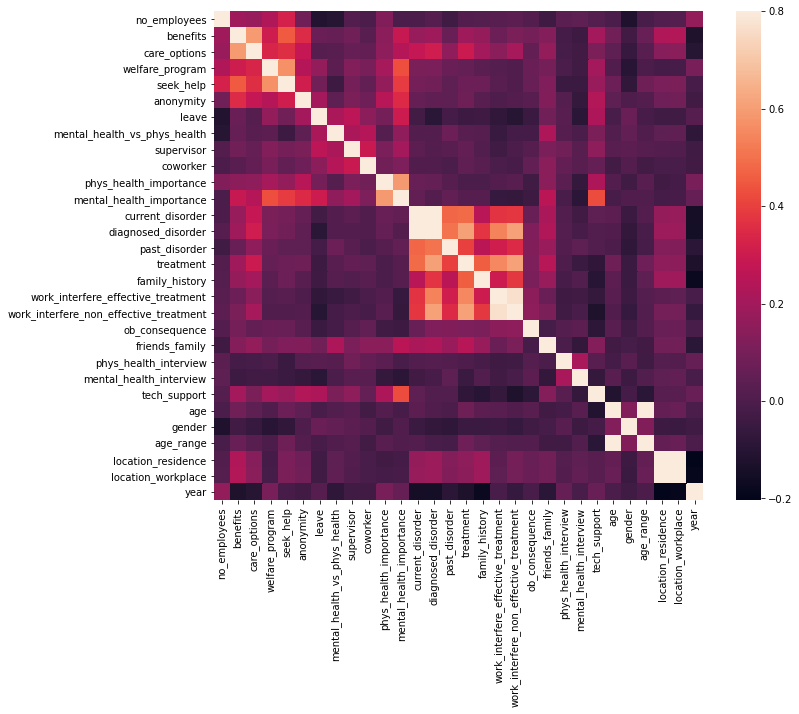

In [22]:
plt.subplots(figsize=(12, 9))
corrmat = input_df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

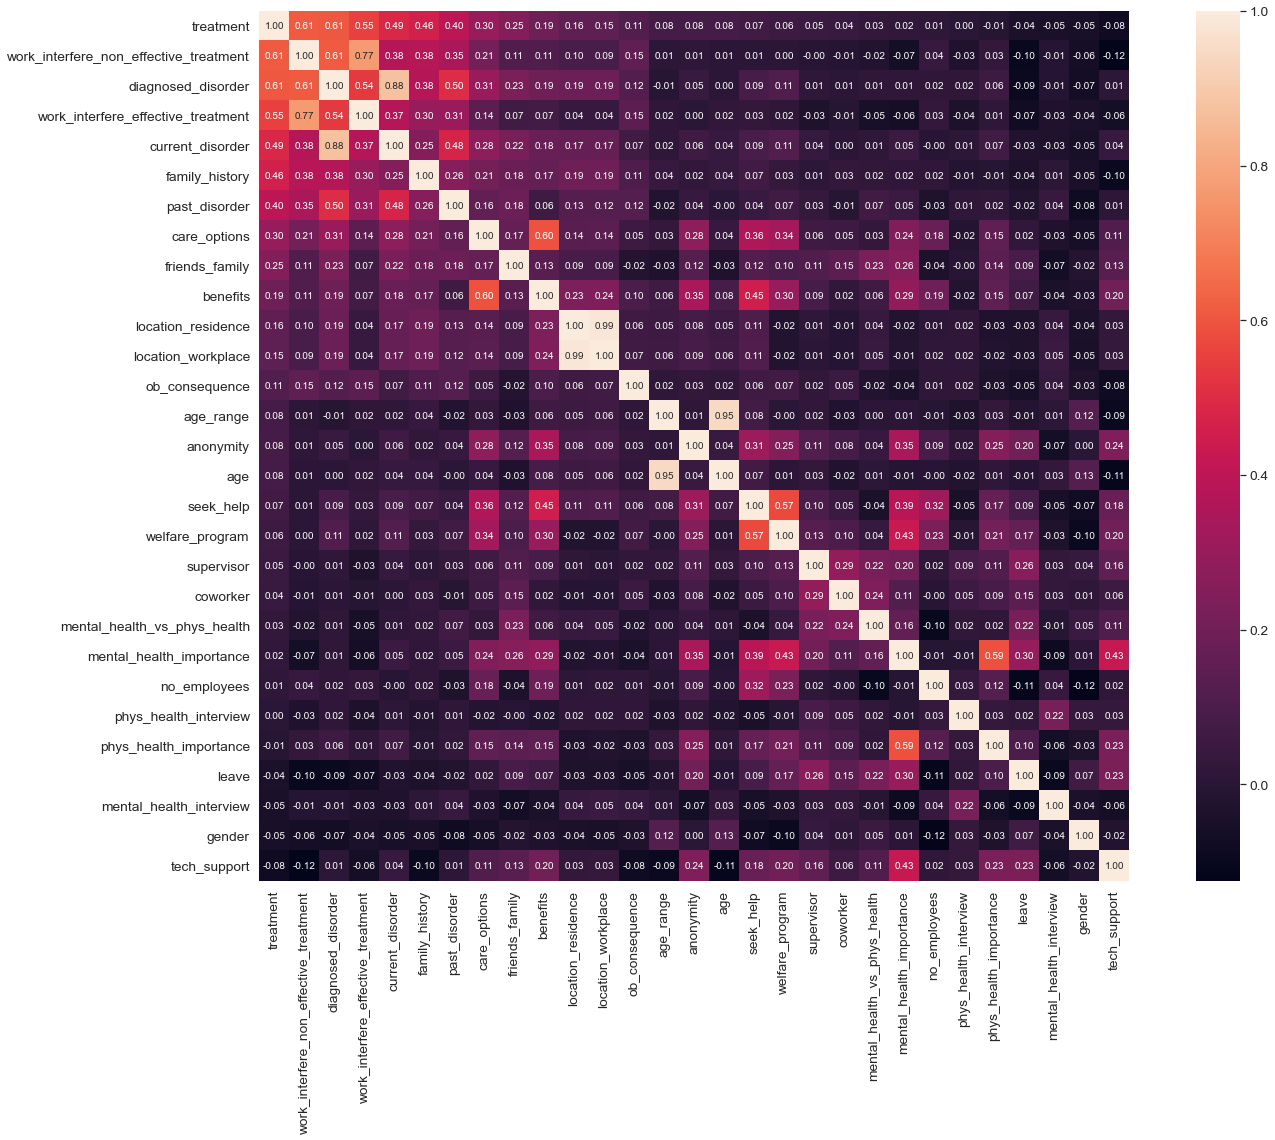

In [23]:
plt.figure(figsize=(24,16))
k = (len(input_df.columns)-1)
cols = corrmat.nlargest(k, "treatment")["treatment"].index
cm = np.corrcoef(input_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                 cbar=True, 
                 annot=True,
                 square=True, 
                 fmt=".2f", 
                 annot_kws={"size": 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)

In [24]:
# get correlation scores of features to target=treatment
corrmat=input_df.corr()
k=len(list(input_df.columns))
cols=corrmat.nlargest(k,"treatment")["treatment"].index
cm=np.corrcoef(input_df[cols].values.T)
corr_scores=corrmat["treatment"].sort_values(ascending=False,key=abs)
corr_scores=corr_scores.iloc[:9]
print("\n########### Top Correlation Scores ###############")
corr_scores_df=pd.DataFrame(data=list(corr_scores),columns=["Correlation_Score"],index=corr_scores.index)
corr_scores_df.sort_values(["Correlation_Score"],ascending=False,key=abs)
display(HTML(corr_scores_df.to_html()))


########### Top Correlation Scores ###############


,Correlation_Score
treatment,1.000000
work_interfere_non_effective_treatment,0.611145
diagnosed_disorder,0.607153
work_interfere_effective_treatment,0.551773
current_disorder,0.489154
family_history,0.462351
past_disorder,0.400963
care_options,0.298009
friends_family,0.250594


<a id="step_2_6_1"></a>
#### 2.6.1 Demographics Profiling

<Figure size 720x504 with 0 Axes>

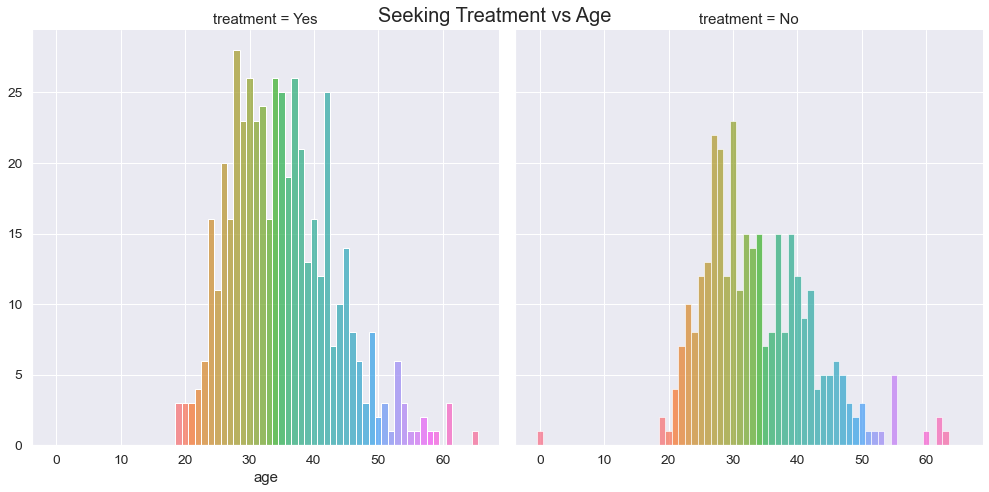

In [25]:
plt.figure(figsize=(10,7))
g = sns.FacetGrid(input_df_original, col="treatment", hue="age", height=7)
g = g.map(sns.histplot, "age")
plt.suptitle("Seeking Treatment vs Age", fontsize=20)
plt.xlabel("")
plt.show()

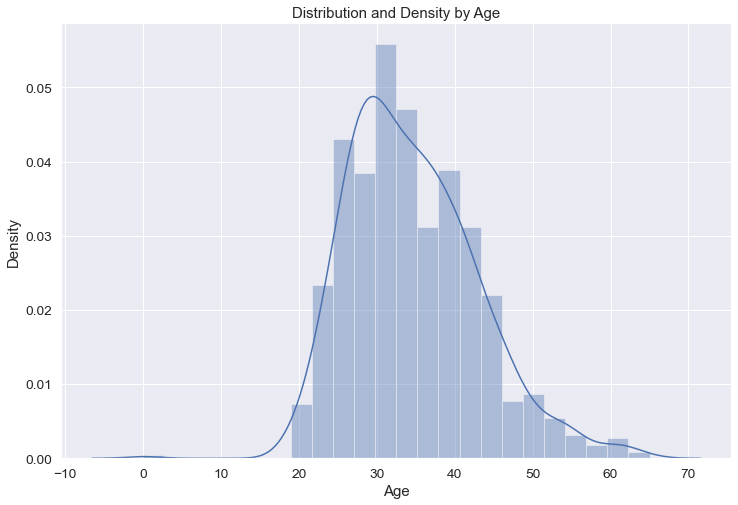

In [26]:
plt.figure(figsize=(12,8))
sns.distplot(input_df_original["age"], bins=24)
plt.title("Distribution and Density by Age")
plt.xlabel("Age")
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


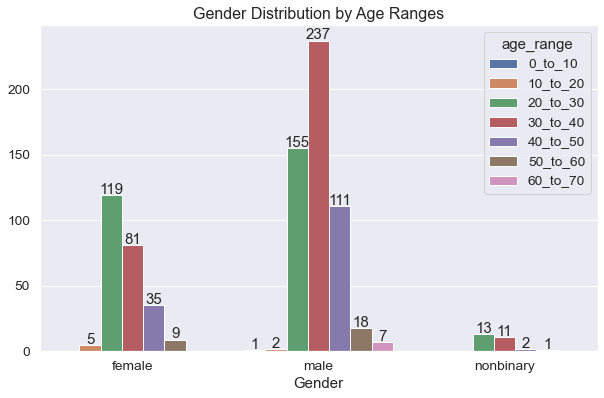

In [27]:
plt.subplots(figsize=(10,6))
ax = sns.countplot(x="gender",
                   hue="age_range",
                   hue_order=input_df_original["age_range"].sort_values().unique(),
                   order=input_df_original["gender"].sort_values().unique(),
                   data=input_df_original
                  )

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x()+p.get_width()/2.,
        height+1,
        "{:1.0f}".format(height),
        ha="center"
    )

plt.suptitle("", fontsize=20)
plt.title("Gender Distribution by Age Ranges", fontsize=16)
plt.xlabel("Gender")
plt.ylabel("")
plt.show()

In [28]:
column_question= {
    "no_employees": "how many employees does your company or organization have?",
    "benefits": "does your employer provide mental health benefits as part of healthcare coverage?",
    "care_options": "do you know the options for mental health care available under your employer-provided health coverage?",
    "welfare_program": "has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
    "seek_help": "does your employer offer resources to learn more about mental health disorders and options for seeking help?",
    "anonymity": "is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?",
    "leave": "if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",
    "mental_health_vs_phys_health": "would you feel more comfortable talking to your coworkers about your physical health or your mental health?",
    "supervisor": "would you feel comfortable discussing a mental health issue with your direct supervisor(s)?",
    "coworker": "would you feel comfortable discussing a mental health issue with your coworkers?",
    "phys_health_importance": "overall, how much importance does your employer place on physical health?",
    "mental_health_importance": "overall, how much importance does your employer place on mental health?",
    "private_coverage": "do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?",
    "current_disorder": "do you currently have a mental health disorder?",
    "diagnosed_disorder": "have you ever been diagnosed with a mental health disorder?",
    "past_disorder": "have you had a mental health disorder in the past?",
    "family_history": "do you have a family history of mental illness?",
    "work_interfere_effective_treatment": "if you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?",
    "work_interfere_non_effective_treatment": "if you have a mental health disorder, how often do you feel that it interferes with your work when not being treated effectively (i.e., when you are experiencing symptoms)?",
    "ob_consequence": "have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?",
    "friends_family": "how willing would you be to share with friends and family that you have a mental illness?",
    "phys_health_interview": "would you be willing to bring up a physical health issue with a potential employer in an interview?",
    "mental_health_interview": "would you bring up your mental health with a potential employer in an interview?"
}

In [29]:
to_plot = {
    "work_interfere_non_effective_treatment":[
        "Work Interference, when NOT treated effectively",
        column_question["work_interfere_non_effective_treatment"]
    ],
    "diagnosed_disorder":[
        "Diagnosed Disorder",
        column_question["diagnosed_disorder"]
    ],
    "work_interfere_effective_treatment":[
        "Work Interference, when treated effectively",
        column_question["work_interfere_effective_treatment"]
    ],
    "current_disorder":[
        "Current Mental Disorder",
        column_question["current_disorder"]
    ],
    "family_history":[
        "Family History",
        column_question["family_history"]
    ],
    "past_disorder":[
        "Past Mental Disorder",
        column_question["past_disorder"]
    ],
    "care_options":[
        "Care Options",
        column_question["care_options"]
    ],
    "benefits":[
        "Benefits",
        column_question["benefits"]
    ]
}

In [30]:
def plot_frequency_of_treatment_vs_feature_chart(feature, caption, question):
    plt.subplots(figsize=(10,7))
    df=input_df_original.copy()
    df=df[["treatment",feature]]
    
    df_stats_left=df.copy()
    df_stats_left=df_stats_left[df_stats_left["treatment"] == "Yes"].groupby(feature,as_index=False).agg("count") 
    df_stats_right=df.copy()
    df_stats_right=df_stats_right[df_stats_right["treatment"] == "No"].groupby(feature,as_index=False).agg("count") 
    
    df_stats=pd.merge(df_stats_left,df_stats_right,how="inner", on=feature, suffixes=("_Yes", "_No"))
    display(HTML(df_stats.to_html()))
    
    ax = sns.countplot(x="treatment", 
                       hue=feature, 
                       hue_order=df[feature].sort_values().unique(),
                       order=df["treatment"].sort_values(ascending=False).unique(),
                       data=df
                      )
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x()+p.get_width()/2.,
            height+3,
            "{:1.0f}".format(height),
            ha="center"
        ) 
        
    plt.suptitle(caption+" vs Treatment", fontsize=20)
    plt.title(question, fontsize=16)
    plt.xlabel("")
    plt.ylabel("")
    plt.show()

<a id="step_2_6_2"></a>
### 2.6.2 First Cut Analysis
- Visualisations to view comparisons between Features with higher correlation scores vs Treatment

,work_interfere_non_effective_treatment,treatment_Yes,treatment_No
0,0,46,208
1,1,2,8
2,2,18,15
3,3,121,40
4,4,299,50


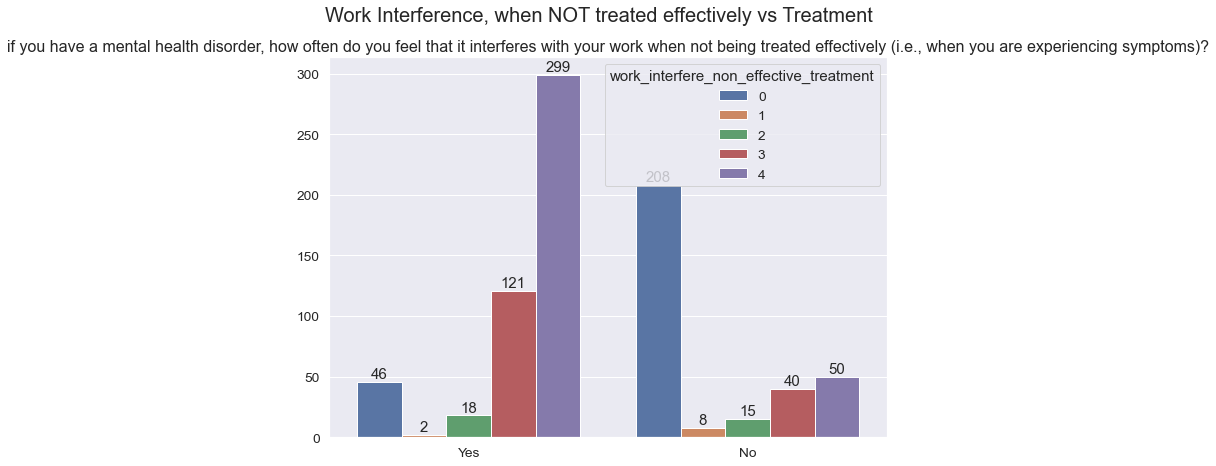

,diagnosed_disorder,treatment_Yes,treatment_No
0,No,172,309
1,Yes,314,12


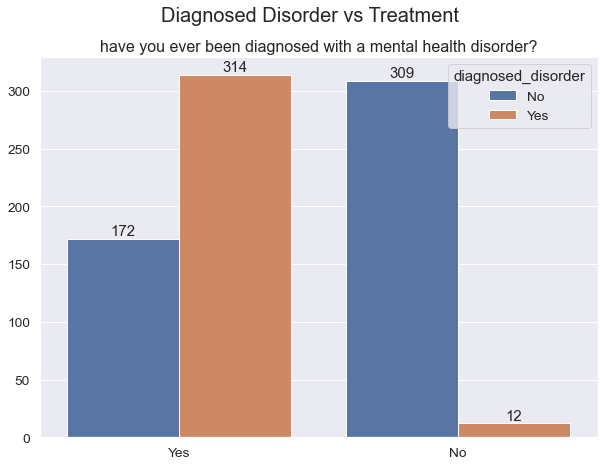

,work_interfere_effective_treatment,treatment_Yes,treatment_No
0,0,62,236
1,1,22,6
2,2,167,31
3,3,183,35
4,4,52,13


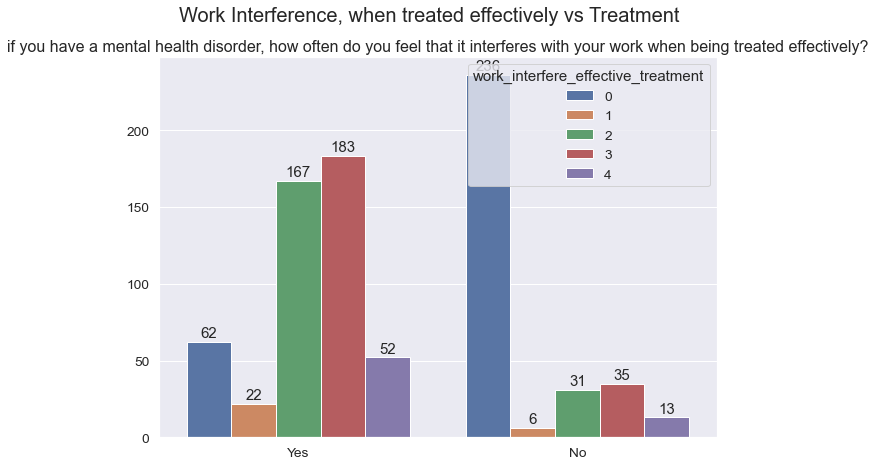

,current_disorder,treatment_Yes,treatment_No
0,Maybe,105,141
1,No,62,167
2,Yes,319,13


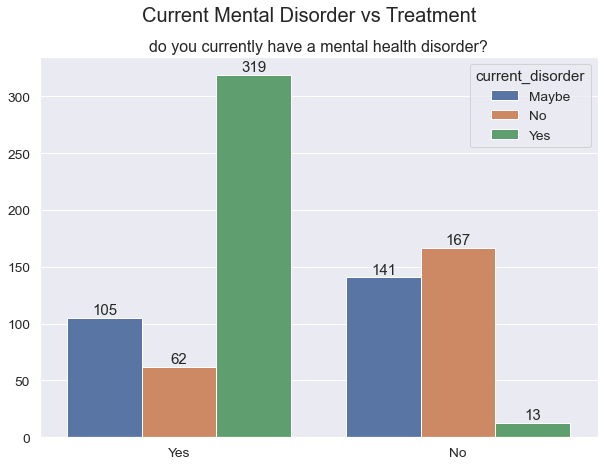

,family_history,treatment_Yes,treatment_No
0,No,75,187
1,Unsure,114,65
2,Yes,297,69


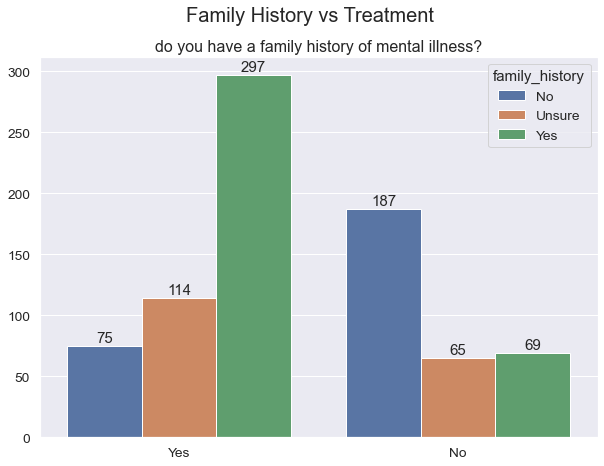

,past_disorder,treatment_Yes,treatment_No
0,Maybe,124,95
1,No,30,210
2,Yes,332,16


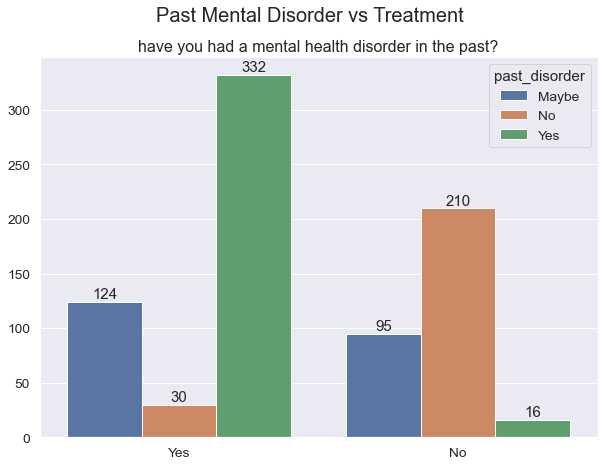

,care_options,treatment_Yes,treatment_No
0,No,225,245
1,Yes,261,76


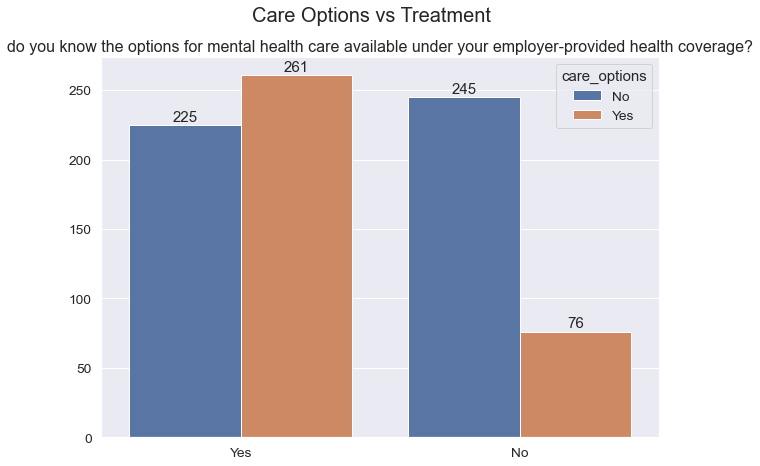

,benefits,treatment_Yes,treatment_No
0,No,85,71
1,Unsure,90,128
2,Yes,311,122


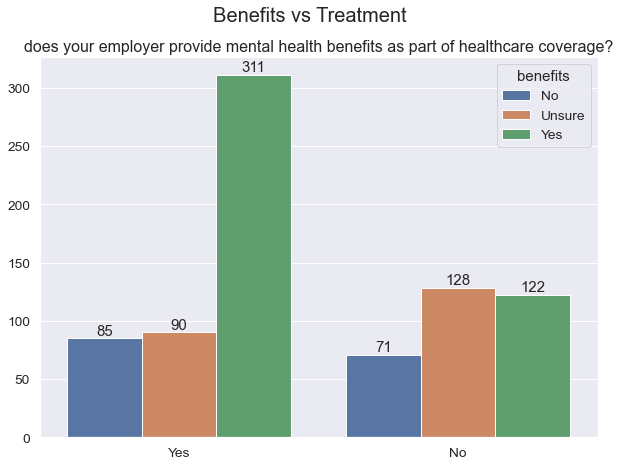

In [31]:
for p in to_plot:
    plot_frequency_of_treatment_vs_feature_chart(p, to_plot[p][0],to_plot[p][1])

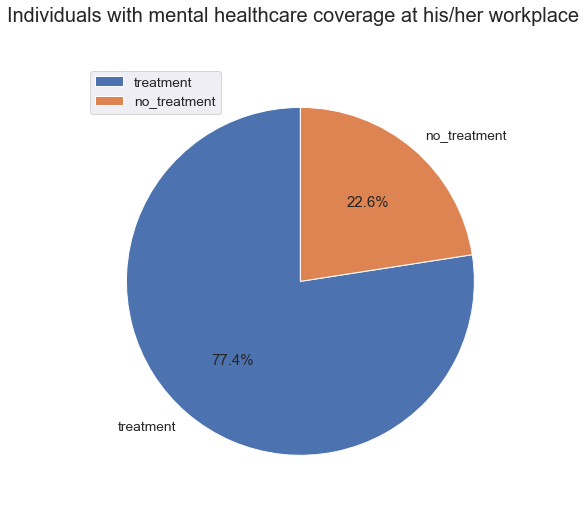

In [32]:
df_care_options_treatment=input_df_original[ (input_df_original["care_options"]=="Yes") & (input_df_original["treatment"]=="Yes")]
df_care_options_treatment=df_care_options_treatment[["care_options","treatment"]] 
df_care_options_treatment=df_care_options_treatment.groupby("care_options",as_index=False).agg("count")

df_care_options_treatment.rename(columns={"treatment":"count"},inplace=True)
df_care_options_treatment.rename(columns={"care_options":"treatment_status"},inplace=True)
df_care_options_treatment["treatment_status"]=df_care_options_treatment["treatment_status"].apply(lambda x: "treatment")

df_care_options_no_treatment=input_df_original[ (input_df_original["care_options"]=="Yes") & (input_df_original["treatment"]=="No")]
df_care_options_no_treatment=df_care_options_no_treatment[["care_options","treatment"]] 
df_care_options_no_treatment=df_care_options_no_treatment.groupby("care_options",as_index=False).agg("count")

df_care_options_no_treatment.rename(columns={"treatment":"count"},inplace=True)
df_care_options_no_treatment.rename(columns={"care_options":"treatment_status"},inplace=True)
df_care_options_no_treatment["treatment_status"]=df_care_options_no_treatment["treatment_status"].apply(lambda x: "no_treatment")

df=pd.concat([df_care_options_treatment,df_care_options_no_treatment])
df.index=df["treatment_status"]
df.drop("treatment_status",axis=1,inplace=True)
df.plot.pie(y="count",figsize=(8, 8),autopct="%1.1f%%", startangle=90)
plt.title("", fontsize=16)
plt.suptitle("Individuals with mental healthcare coverage at his/her workplace", fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

,0,1,2,3,4,5,6,7,8,9,10
friends_family,0,1,2,3,4,5,6,7,8,9,10
treatment,11,9,23,20,12,46,34,68,93,63,107
no_treatment,15,10,15,25,25,57,35,53,43,19,24


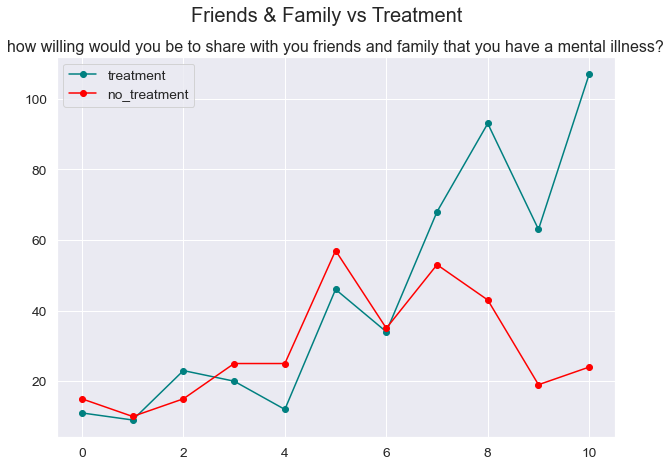

In [33]:
df_treatment=input_df_original[input_df_original["treatment"]=="Yes"].groupby("friends_family",as_index=False).agg("size")
df_treatment.rename(columns={"size":"treatment"},inplace=True)
df_no_treatment=input_df_original[input_df_original["treatment"]=="No"].groupby("friends_family",as_index=False).agg("size")
df_no_treatment.rename(columns={"size":"no_treatment"},inplace=True)

df=df_treatment.merge(df_no_treatment, how="inner", on=["friends_family"])
display(HTML(df.T.to_html()))

plt.subplots(figsize=(10,7))
ax = plt.gca()
df.plot(kind="line",x="friends_family",y="treatment",color="teal",marker="o",ax=ax)
df.plot(kind="line",x="friends_family",y="no_treatment",color="red",marker="o",ax=ax)
plt.suptitle("Friends & Family vs Treatment", fontsize=20)
plt.title("how willing would you be to share with you friends and family that you have a mental illness?", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

<a id="step_2_6_3"></a>
### 2.6.3 Further Analysis
- Deep-diving into why individuals who may have an existing mental health condition choose to not seek professional treatment

In [34]:
df=input_df_original.groupby(["treatment","diagnosed_disorder","current_disorder"],as_index=False).agg("size")
df_treatment=df[df["treatment"]=="Yes"]
df_treatment.drop("treatment",axis=1,inplace=True)
df_treatment.rename(columns={"size":"treatment"},inplace=True)

df_no_treatment=df[df["treatment"]=="No"]
df_no_treatment.drop("treatment",axis=1,inplace=True)
df_no_treatment.rename(columns={"size":"no_treatment"},inplace=True)

df=df_treatment.merge(df_no_treatment, how="outer", on=["diagnosed_disorder","current_disorder"])
df["current_disorder"]=df["current_disorder"].replace(["Yes","No","Maybe"],["existing","no_existing","possible_existing"])
df["diagnosed_disorder"]=df["diagnosed_disorder"].replace(["Yes", "No"],["diagnosed_disorder","undiagnosed_disorder"])

cols_to_join=["current_disorder","diagnosed_disorder"]
df["disorder_status"]=df[cols_to_join].apply(lambda row: "_".join(row.values.astype(str)), axis=1)
df.drop(cols_to_join,axis=1,inplace=True)
df

,treatment,no_treatment,disorder_status
0,105,141,possible_existing_undiagnosed_disorder
1,62,167,no_existing_undiagnosed_disorder
2,5,1,existing_undiagnosed_disorder
3,314,12,existing_diagnosed_disorder


<b>Note</b>: The individuals which ought to be paid more attention to are those who have <mark>possible existing yet undiagnosed mental disorder(s)</mark> (disorder_status=`possible_existing_undiagnosed_disorder`).<br>

- This signifies that they have yet to go for professional treatment for a proper diagnosis despite suspecting themselves of having mental health issues.

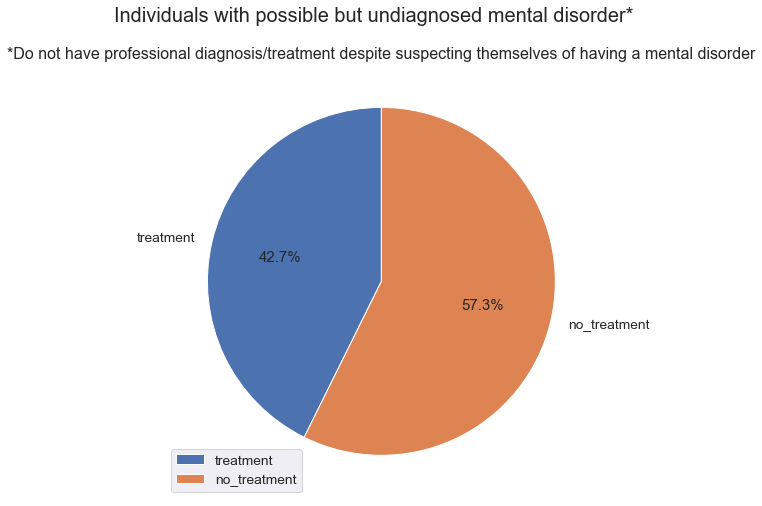

In [35]:
df=df[df["disorder_status"]=="possible_existing_undiagnosed_disorder"]
df_disorder_status_treatment=df[["disorder_status","treatment"]]
df_disorder_status_no_treatment=df[["disorder_status","no_treatment"]]
df=df_disorder_status_treatment.merge(df_disorder_status_no_treatment)
df.drop(columns=["disorder_status"],inplace=True)
dft=df.T
dft=dft.rename(columns={0:"possible_existing_undiagnosed_disorder"})
dft["treatment_status"]=dft.index
dft.plot.pie(y="possible_existing_undiagnosed_disorder",figsize=(8, 8),autopct="%1.1f%%", startangle=90)
plt.title("*Do not have professional diagnosis/treatment despite suspecting themselves of having a mental disorder", fontsize=16)
plt.suptitle("Individuals with possible but undiagnosed mental disorder*", fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

,no_employees,treatment,no_treatment
0,100_to_500,29,29
1,26_to_100,16,24
2,500_to_1000,11,16
3,6_to_25,11,21
4,more_than_1000,36,51


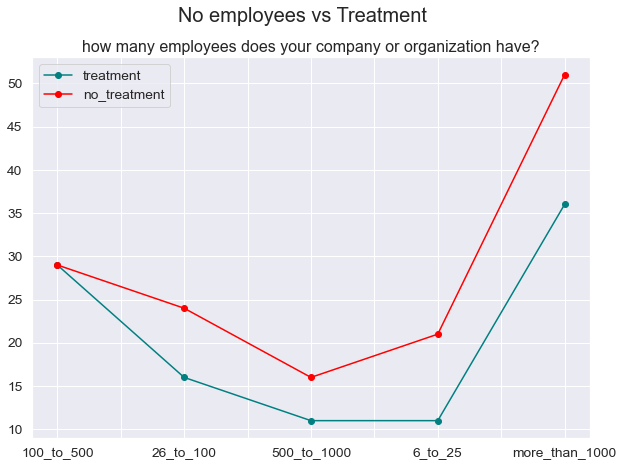

,benefits,treatment,no_treatment
0,No,23,36
1,Unsure,20,60
2,Yes,62,45


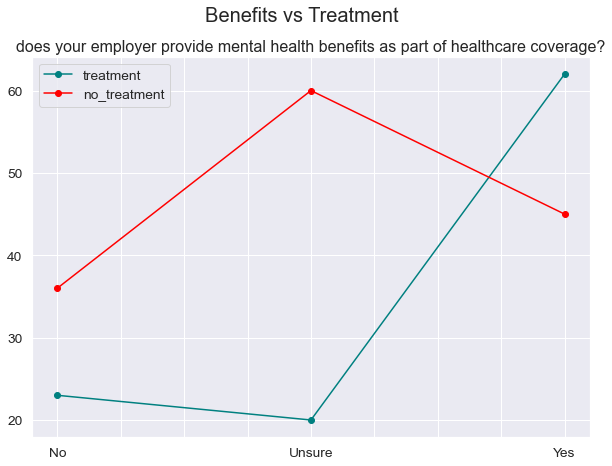

,care_options,treatment,no_treatment
0,No,60,118
1,Yes,45,23


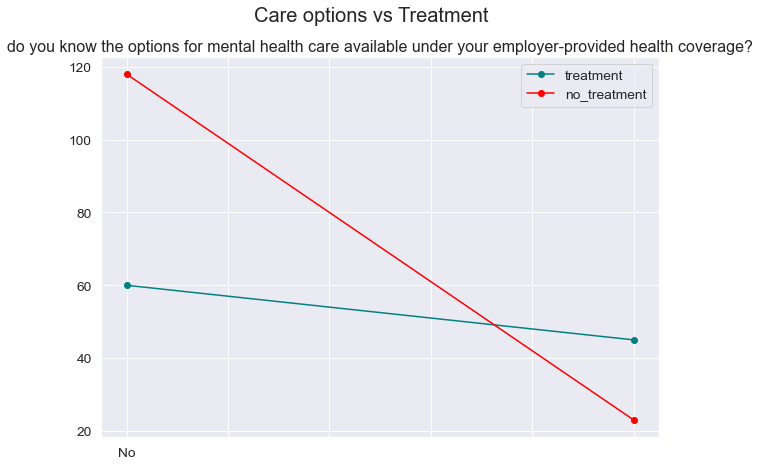

,welfare_program,treatment,no_treatment
0,No,68,93
1,Unsure,5,17
2,Yes,32,31


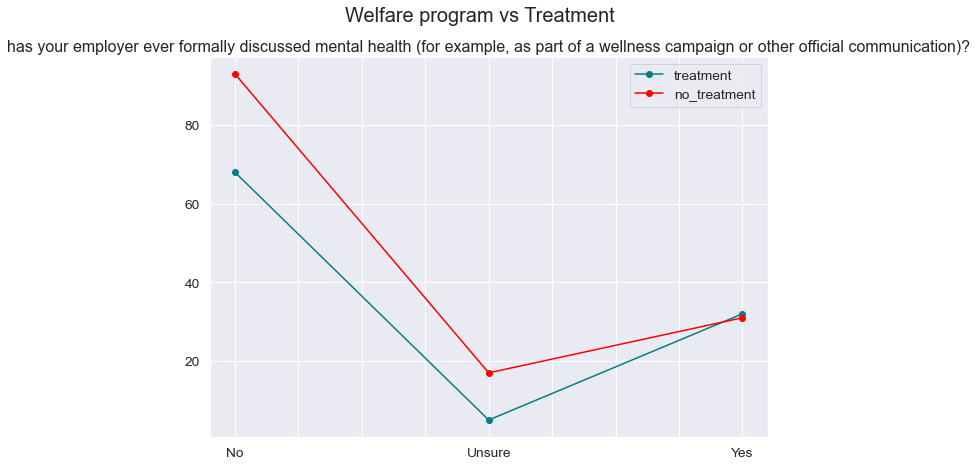

,seek_help,treatment,no_treatment
0,No,46,72
1,Unsure,24,35
2,Yes,35,34


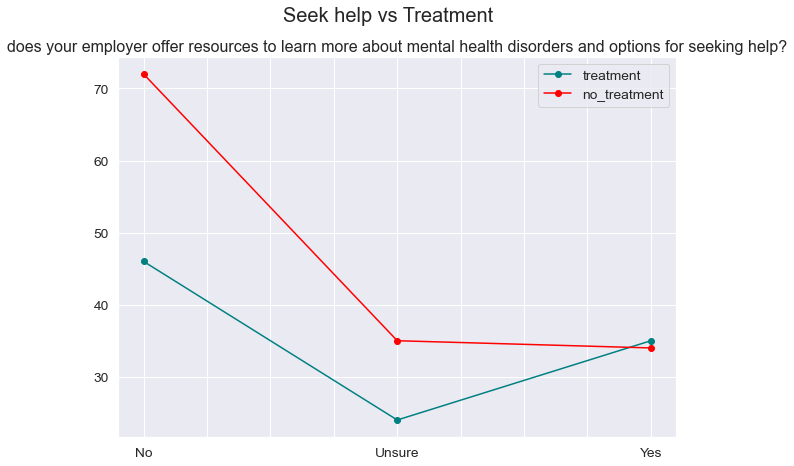

,anonymity,treatment,no_treatment
0,No,6,14
1,Unsure,58,95
2,Yes,41,32


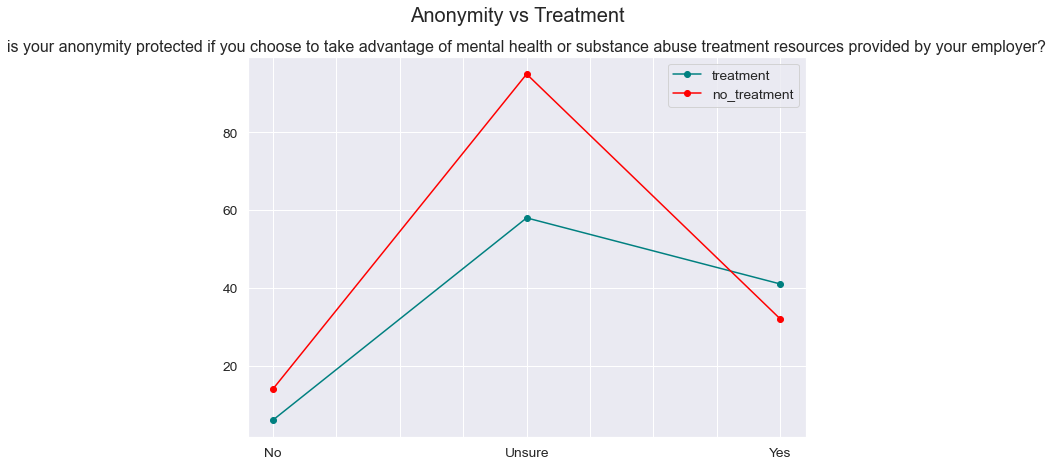

,leave,treatment,no_treatment
0,0,16,30
1,1,13,12
2,2,19,19
3,3,13,17
4,4,24,37
5,5,20,26


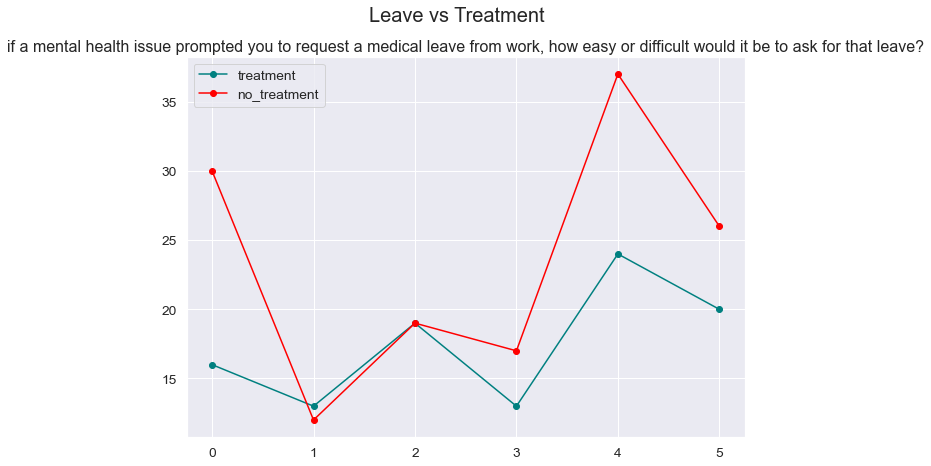

,mental_health_vs_phys_health,treatment,no_treatment
0,mental,2,2
1,physical,72,102
2,same,31,37


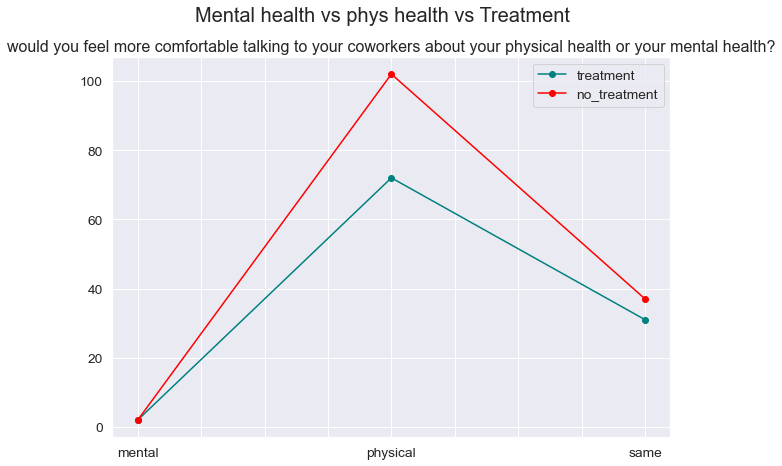

,supervisor,treatment,no_treatment
0,Maybe,28,48
1,No,43,57
2,Yes,34,36


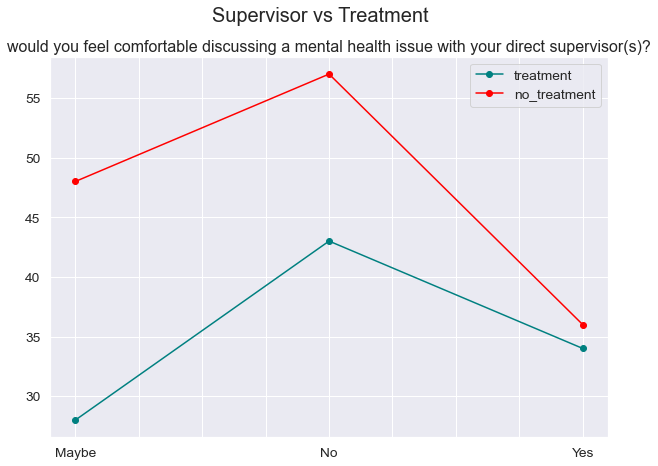

,coworker,treatment,no_treatment
0,Maybe,44,56
1,No,28,55
2,Yes,33,30


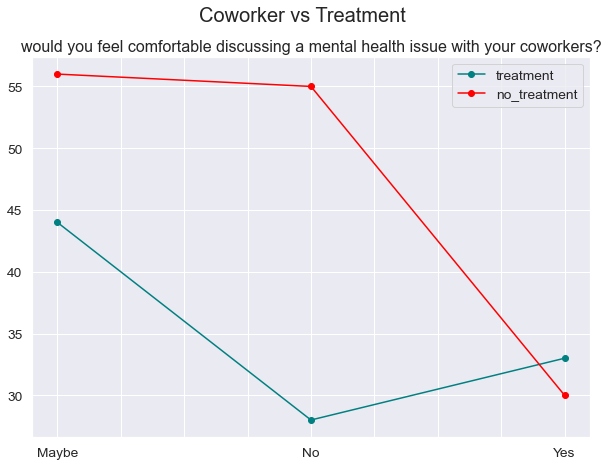

,phys_health_importance,treatment,no_treatment
0,0,4,6
1,2,3,5
2,3,6,9
3,4,10,7
4,5,19,30
5,6,16,20
6,7,18,19
7,8,23,19
8,9,3,11
9,10,3,13


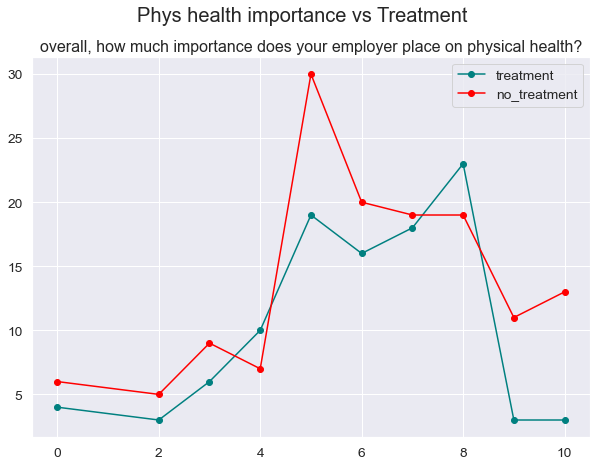

,mental_health_importance,treatment,no_treatment
0,0,10,12
1,1,3,7
2,2,8,15
3,3,10,15
4,4,10,14
5,5,21,37
6,6,11,16
7,7,15,13
8,8,11,6
9,9,4,3


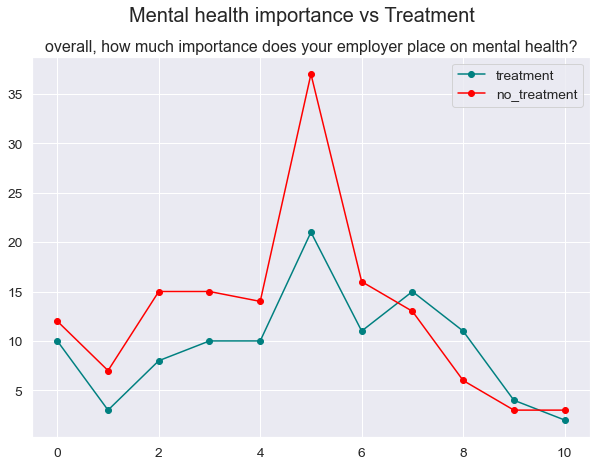

,past_disorder,treatment,no_treatment
0,Maybe,53,72
1,No,6,59
2,Yes,46,10


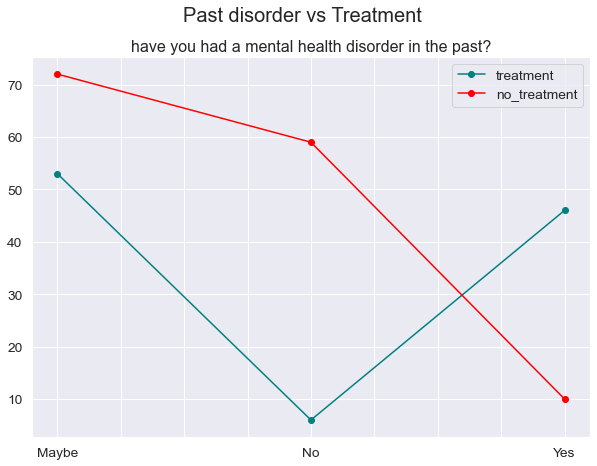

,family_history,treatment,no_treatment
0,No,21,64
1,Unsure,28,37
2,Yes,56,40


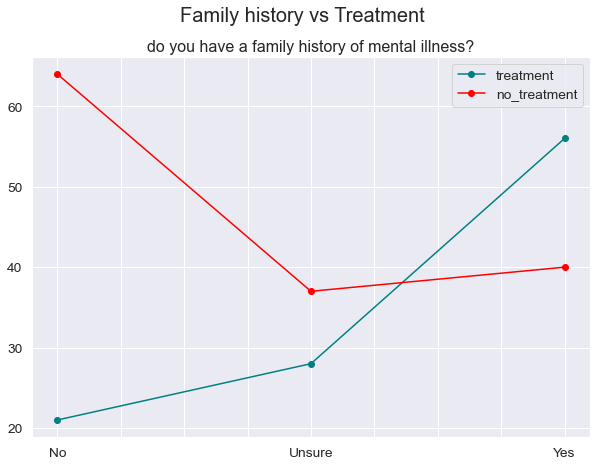

,work_interfere_effective_treatment,treatment,no_treatment
0,0,26,87
1,1,5,2
2,2,28,19
3,3,39,26
4,4,7,7


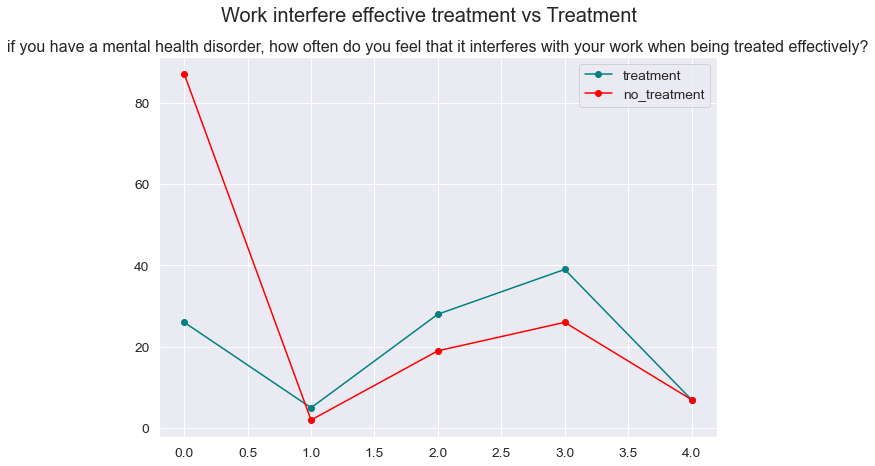

,work_interfere_non_effective_treatment,treatment,no_treatment
0,0,12,62
1,2,5,10
2,3,45,31
3,4,43,35


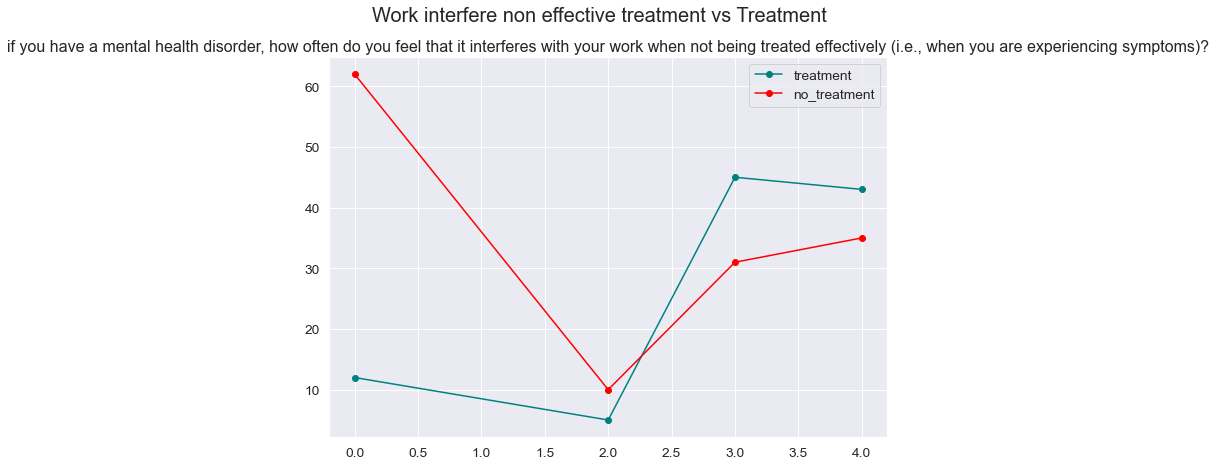

,ob_consequence,treatment,no_treatment
0,Maybe,31,55
1,No,54,63
2,Yes,20,23


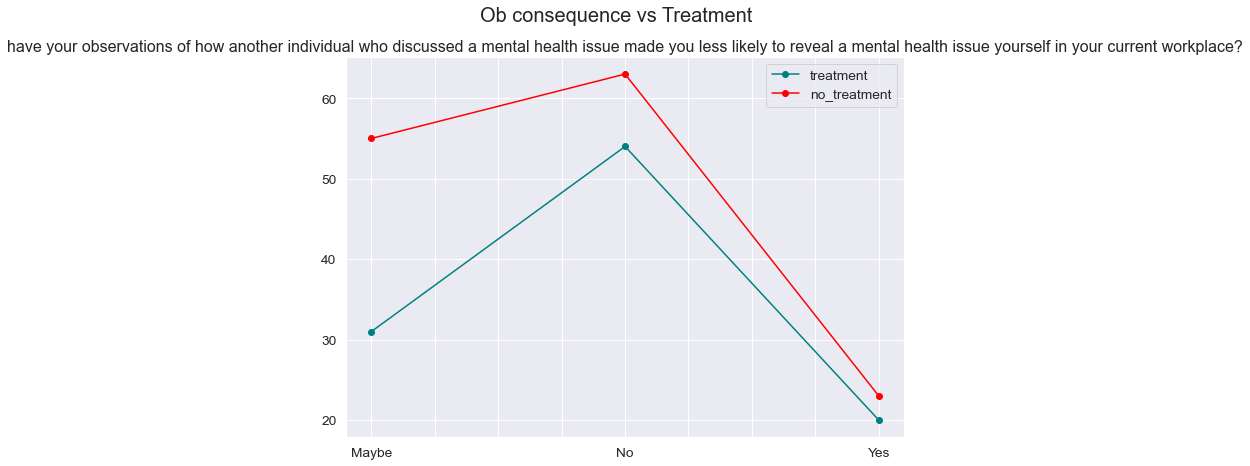

,friends_family,treatment,no_treatment
0,0,3,8
1,1,1,1
2,2,12,8
3,3,5,12
4,5,14,28
5,6,10,17
6,7,17,20
7,8,20,17
8,9,11,6
9,10,12,10


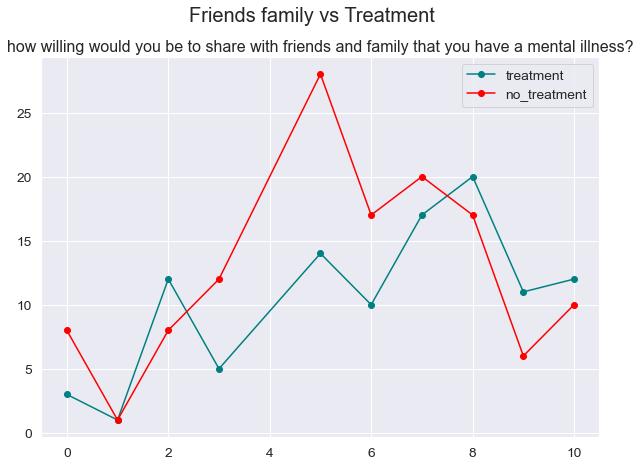

,phys_health_interview,treatment,no_treatment
0,Maybe,40,56
1,No,45,52
2,Yes,20,33


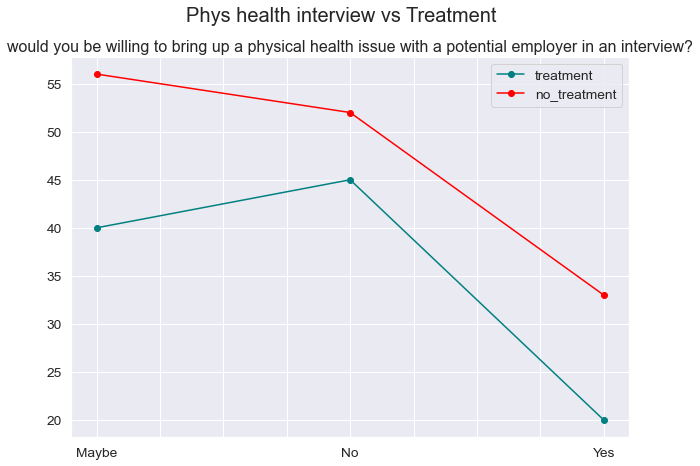

,mental_health_interview,treatment,no_treatment
0,Maybe,25,25
1,No,77,110
2,Yes,3,6


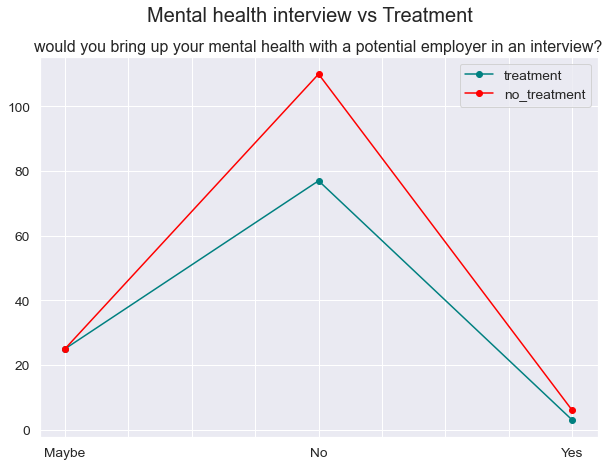

In [36]:
df=input_df_original.copy()
df["current_disorder"]=df["current_disorder"].replace(["Yes","No","Maybe"],["existing","no existing","possible existing"])
df["diagnosed_disorder"]=df["diagnosed_disorder"].replace(["Yes", "No"],["diagnosed disorder","undiagnosed disorder"])

cols_to_join=["current_disorder","diagnosed_disorder"]
df["disorder_status"]=df[cols_to_join].apply(lambda row: ",".join(row.values.astype(str)), axis=1)
df.drop(cols_to_join,axis=1,inplace=True)
df=df[df["disorder_status"]=="possible existing,undiagnosed disorder"]
df.drop(["year","tech_support","age","gender","age_range",
         "location_residence","location_workplace"],axis=1,inplace=True)

cols=[
    "no_employees",
    "benefits",
    "care_options",
    "welfare_program",
    "seek_help",
    "anonymity",
    "leave",
    "mental_health_vs_phys_health",
    "supervisor",
    "coworker",
    "phys_health_importance",
    "mental_health_importance",
    "past_disorder",
    "family_history",
    "work_interfere_effective_treatment",
    "work_interfere_non_effective_treatment",
    "ob_consequence",
    "friends_family",
    "phys_health_interview",
    "mental_health_interview"
]

for col in cols:
    df_treatment=df[df["treatment"]=="Yes"].groupby(col,as_index=False).agg("size")
    df_treatment.rename(columns={"size":"treatment"},inplace=True)
    df_no_treatment=df[df["treatment"]=="No"].groupby(col,as_index=False).agg("size")
    df_no_treatment.rename(columns={"size":"no_treatment"},inplace=True)
    df_chart=df_treatment.merge(df_no_treatment, how="inner", on=[col])
    display(HTML(df_chart.to_html()))
    
    plt.subplots(figsize=(10,7))
    ax = plt.gca()
    df_chart.plot(kind="line",x=col,y="treatment",color="teal",marker="o",ax=ax)
    df_chart.plot(kind="line",x=col,y="no_treatment",color="red",marker="o",ax=ax)
    
    title_prefix=" ".join(col.split("_")).capitalize()
    plt.suptitle(title_prefix + " vs Treatment", fontsize=20)
    plt.title(column_question[col], fontsize=16)
    plt.xlabel("")
    plt.ylabel("")
    plt.show()

<a id="step_3"></a>
### Step 3. Choosing a Model
<img src="ml_map.png" />

In [37]:
# models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
# Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB 
# Stacking
from mlxtend.classifier import StackingClassifier

# model evaluation and validation 
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

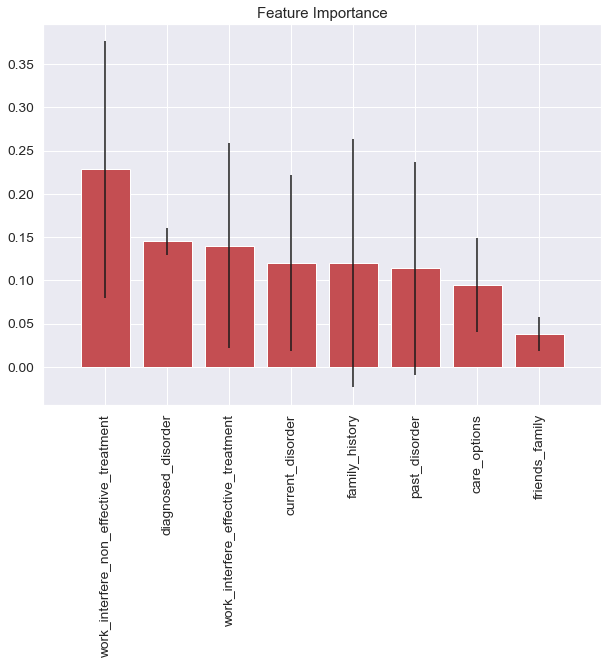


########### Feature Importance ###############


,Feature_Importance
work_interfere_non_effective_treatment,0.140101
diagnosed_disorder,0.119860
work_interfere_effective_treatment,0.120012
current_disorder,0.113769
family_history,0.094610
past_disorder,0.228251
care_options,0.037950
friends_family,0.145447


In [38]:
# feature extraction
data_cols=list(corr_scores.index.copy())
input_df=input_df[data_cols]

feature_cols=data_cols.copy()
feature_cols.remove("treatment")

# split into training and test datasets
X = input_df[feature_cols]
y = input_df.treatment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# feature importance
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])

plt.figure(figsize=(10,7))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")

plt.xticks(range(X.shape[1]), labels, rotation="vertical")
plt.xlim([-1, X.shape[1]])
plt.show()

print("\n########### Feature Importance ###############")
feature_imp_df=pd.DataFrame(data=list(importances),columns=["Feature_Importance"],index=labels)
feature_imp_df.sort_values(["Feature_Importance"], ascending=False)
display(HTML(feature_imp_df.to_html()))

**Note**: This tallies with the earlier correlation matrix.

<a id="step_4"></a>
### Step 4. Training the model & Hyperparameter Tuning

### Evaluating a Classification Model

#### This function will evaluate:
- **Classification accuracy**: % of Correct Predictions
    * **Classification accuracy** is the easiest classification metric to understand
        * But, it does not tell you the underlying distribution of response values
        * And, it does not tell you what "types" of errors your classifier is making
- **Null accuracy**: accuracy that could be achieved by always predicting the most frequent class
- **Percentage of ones**
- **Percentage of zeros**
- **Confusion matrix**: Table that describes the performance of a classification model
```
  True Positives (TP):  Correctly predicted, Result=+ve
  True Negatives (TN):  Correctly predicted, Result=-ve
  False Positives (FP): Incorrectly predicted, Result=+ve (a "Type I error")
  False Negatives (FN): Incorrectly predicted, Result=-ve (a "Type II error")
``` 

- **False Positive Rate**
- **Precision of Positive value**
- **AUC**: % of the ROC plot that is underneath the curve
```
  .90-1 = excellent (A)
  .80-.90 = good (B)
  .70-.80 = fair (C)
  .60-.70 = poor (D)
  .50-.60 = fail (F)
```
* **Sensitivity**: When the actual value is positive, how often is the prediction correct?
* **Specificity**: When the actual value is negative, how often is the prediction correct?

In [39]:
def evalClassModel(model, y_test, y_pred_class):
    plot=True
    
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred_class))
    print("Null accuracy:\n", y_test.value_counts())
    print("Percentage of ones:", y_test.mean())
    print("Percentage of zeros:",1 - y_test.mean())
    print("True:", y_test.values[0:25])
    print("Pred:", y_pred_class[0:25])

    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    classification_accuracy=metrics.accuracy_score(y_test, y_pred_class)
    classification_error=1-classification_accuracy
    print("Classification Accuracy:", classification_accuracy)
    print("Classification Error:", classification_error)

    false_positive_rate = FP/float(TN + FP)
    precision=metrics.precision_score(y_test, y_pred_class)
    auc_score=metrics.roc_auc_score(y_test, y_pred_class)
    cross_validated_auc_score=cross_val_score(model, X, y, cv=10, scoring="roc_auc").mean()
    print("False Positive Rate:", false_positive_rate)
    print("Precision:", precision)
    print("AUC Score:", auc_score)
    print("Cross-validated AUC:", cross_validated_auc_score)
 
    ##########################################
    # Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print("First 10 predicted responses:\n", model.predict(X_test)[0:10])
    print("First 10 predicted probabilities of class members:\n", model.predict_proba(X_test)[0:10])
    model.predict_proba(X_test)[0:10, 1]
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot==True:
        plt.rcParams["font.size"] = 12
        plt.hist(y_pred_prob, bins=8)
        plt.xlim(0,1)
        plt.title("Histogram of predicted probabilities")
        plt.xlabel("Predicted probability of treatment")
        plt.ylabel("Frequency")

    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    print("First 10 predicted probabilities:\n", y_pred_prob[0:10])

    ##########################################
    # ROC Curves and Area Under the Curve (AUC)
    ##########################################
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot==True:
        plt.figure()
        plt.plot(fpr, tpr, color="darkorange", label="ROC curve (area = %0.2f)" % roc_auc)
        plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams["font.size"] = 12
        plt.title("ROC curve for treatment classifier")
        plt.xlabel("False Positive Rate (1 - Specificity)")
        plt.ylabel("True Positive Rate (Sensitivity)")
        plt.legend(loc="lower right")
        plt.show()

    def evaluate_threshold(threshold):
        print("Sensitivity for " + str(threshold) + " :", tpr[thresholds > threshold][-1])
        print("Specificity for " + str(threshold) + " :", 1 - fpr[thresholds > threshold][-1])

    predict_mine=np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    confusion_df=pd.DataFrame(confusion,columns=["Predicted_N","Predicted_P"],index=["Actual_N","Actual_P"])
    print(confusion_df)
    
    return [classification_accuracy,
            classification_error,
            false_positive_rate,
            precision,
            auc_score, 
            cross_validated_auc_score]

In [40]:
# initialise dict to save accuracy scores and trained models
method_dict = {}
rmse_dict = {}

from tqdm import trange
data_records=[]

# initialise and start logging model training
start = get_current_datetime("%d%b%Y_%H%M%S_%f")
start=datetime_str_parser(start,"%d%b%Y_%H%M%S_%f")
end = get_current_datetime("%d%b%Y_%H%M%S_%f")
end=datetime_str_parser(end,"%d%b%Y_%H%M%S_%f")

def do_something(description):
    timestamp = get_current_datetime("%d%b%Y_%H%M%S_%f")
    data_records.append([description,timestamp])
    
def log_event():
    end = get_current_datetime("%d%b%Y_%H%M%S_%f")
    end=datetime_str_parser(end,"%d%b%Y_%H%M%S_%f")
    time_elapsed=(end-start)
    return (time_elapsed)

def logisticRegression():
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred_class = logreg.predict(X_test)
    print("\n########### Logistic Regression ###############")
    
    score_arr=evalClassModel(logreg, y_test, y_pred_class)
    accuracy_score=score_arr[0]
    
    method_dict["Log. Regres."] = accuracy_score * 100
    rmse_dict["Log. Regres."]=logreg
    time_elapsed=log_event()
    score_arr.append(time_elapsed)
    return score_arr

# parameter tuning methods
def tuningCV(knn):
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores=cross_val_score(knn, X, y, cv=10, scoring="accuracy")
        k_scores.append(scores.mean())
    print(k_scores)
    plt.plot(k_range, k_scores)
    plt.xlabel("Value of K for KNN")
    plt.ylabel("Cross-Validated Accuracy")
    plt.show()

def tuningGridSerach(knn):
    k_range = list(range(1, 31))
    print(k_range)
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
    grid.fit(X, y)
    grid.grid_scores_
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    print("\nGridSearch best score", grid.best_score_)
    print("\nGridSearch best params", grid.best_params_)
    print("\nGridSearch best estimator", grid.best_estimator_)

def tuningRandomizedSearchCV(model, param_dist):
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring="accuracy", n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
    print("\nRand. Best Score: ", rand.best_score_)
    print("\nRand. Best Params: ", rand.best_params_)
    best_scores=[]
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

def tuningMultParam(knn):
    k_range = list(range(1, 31))
    weight_options = ["uniform", "distance"]
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid)
    grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
    grid.fit(X, y)
    print(grid.grid_scores_)
    print("\nMultiparam. Best Score: ", grid.best_score_)
    print("\nMultiparam. Best Params: ", grid.best_params_)


def Knn():
    knn = KNeighborsClassifier(n_neighbors=5)
    k_range = list(range(1, 31))
    weight_options = ["uniform", "distance"]
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    knn = KNeighborsClassifier(n_neighbors=27, weights="uniform")
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    print("\n########### KNeighborsClassifier ###############")
    score_arr = evalClassModel(knn, y_test, y_pred_class)
    accuracy_score=score_arr[0]
    method_dict["KNN"] = accuracy_score * 100
    rmse_dict["KNN"]=knn
    time_elapsed=log_event()
    score_arr.append(time_elapsed)
    return score_arr

def treeClassifier():
    tree = DecisionTreeClassifier()
    features_size = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
                  "max_features": randint(1, features_size),
                  "min_samples_split": randint(2, 9),
                  "min_samples_leaf": randint(1, 9),
                  "criterion": ["gini", "entropy"]
                 }
    tuningRandomizedSearchCV(tree, param_dist)
    tree = DecisionTreeClassifier(max_depth=3, 
                                  min_samples_split=8, 
                                  max_features=6, 
                                  criterion="entropy", 
                                  min_samples_leaf=7
                                 )
    tree.fit(X_train, y_train)
    y_pred_class = tree.predict(X_test)
    print("\n########### Tree classifier ###############")
    score_arr=evalClassModel(tree, y_test, y_pred_class)
    accuracy_score=score_arr[0]
    method_dict["Tree clas."] = accuracy_score * 100
    rmse_dict["Tree clas."]=tree
    time_elapsed=log_event()
    score_arr.append(time_elapsed)
    return score_arr

def randomForest():
    forest = RandomForestClassifier(n_estimators = 20)
    features_size = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
                  "max_features": randint(1, features_size),
                  "min_samples_split": randint(2, 9),
                  "min_samples_leaf": randint(1, 9),
                  "criterion": ["gini", "entropy"]
                 }
    tuningRandomizedSearchCV(forest, param_dist)
    forest = RandomForestClassifier(max_depth = None, 
                                    min_samples_leaf=8, 
                                    min_samples_split=2, 
                                    n_estimators=20, 
                                    random_state=1)
    my_forest = forest.fit(X_train, y_train)
    y_pred_class = my_forest.predict(X_test)
    print("\n########### Random Forests ###############")
    score_arr=evalClassModel(my_forest, y_test, y_pred_class)
    accuracy_score=score_arr[0]
    method_dict["R. Forest"] = accuracy_score * 100
    rmse_dict["R. Forest"]=my_forest
    time_elapsed=log_event()
    score_arr.append(time_elapsed)
    return score_arr

def bagging():
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    y_pred_class = bag.predict(X_test)
    print("\n########### Bagging ###############")
    score_arr=evalClassModel(bag, y_test, y_pred_class)
    accuracy_score=score_arr[0]
    method_dict["Bagging"] = accuracy_score * 100
    rmse_dict["Bagging"]=bag
    time_elapsed=log_event()
    score_arr.append(time_elapsed)
    return score_arr

def boosting():
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    y_pred_class = boost.predict(X_test)
    print("\n########### Boosting ###############")
    score_arr=evalClassModel(boost, y_test, y_pred_class)
    accuracy_score=score_arr[0]
    method_dict["Boosting"] = accuracy_score * 100
    rmse_dict["Boosting"]=boost
    time_elapsed=log_event()
    score_arr.append(time_elapsed)
    return score_arr

def stacking():
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()
    stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
    stack.fit(X_train, y_train)
    y_pred_class = stack.predict(X_test)
    print("\n########### Stacking ###############")
    score_arr = evalClassModel(stack, y_test, y_pred_class)
    accuracy_score=score_arr[0]
    method_dict["Stacking"] = accuracy_score * 100
    rmse_dict["Stacking"]=stack
    time_elapsed=log_event()
    score_arr.append(time_elapsed)
    return score_arr

<a id="step_4_1"></a>
#### 4.1 Logistic Regression


########### Part 3. MODEL TRAINING ###############
outer loop:   0%|                                                                                | 0/1 [00:00<?, ?it/s]
inner loop:   0%|                                                                          | 0.00/1.00 [00:00<?, ?it/s]
########### Logistic Regression ###############
Accuracy: 0.8353909465020576
Null accuracy:
 1    149
0     94
Name: treatment, dtype: int64
Percentage of ones: 0.6131687242798354
Percentage of zeros: 0.3868312757201646
True: [1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0]
Pred: [1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0]


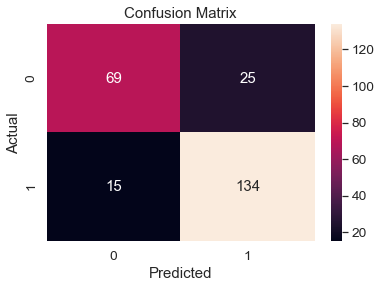

Classification Accuracy: 0.8353909465020576
Classification Error: 0.16460905349794241
False Positive Rate: 0.26595744680851063
Precision: 0.8427672955974843
AUC Score: 0.816685706125946
Cross-validated AUC: 0.9225211699263038
First 10 predicted responses:
 [1 1 1 1 1 1 1 1 0 0]
First 10 predicted probabilities of class members:
 [[0.01615674 0.98384326]
 [0.27842162 0.72157838]
 [0.29185563 0.70814437]
 [0.01168621 0.98831379]
 [0.37555104 0.62444896]
 [0.00906173 0.99093827]
 [0.49381075 0.50618925]
 [0.0088901  0.9911099 ]
 [0.873352   0.126648  ]
 [0.92383383 0.07616617]]
First 10 predicted probabilities:
 [[0.98384326]
 [0.72157838]
 [0.70814437]
 [0.98831379]
 [0.62444896]
 [0.99093827]
 [0.50618925]
 [0.9911099 ]
 [0.126648  ]
 [0.07616617]]


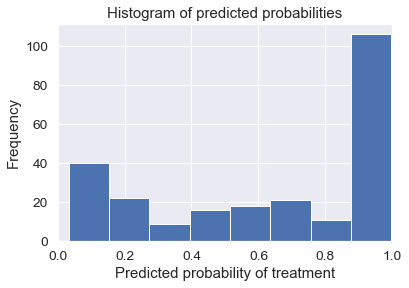

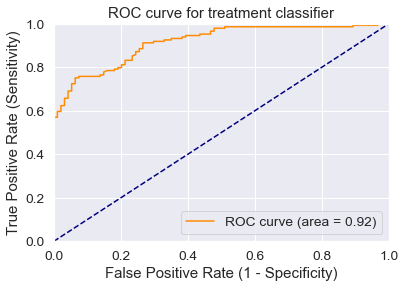

          Predicted_N  Predicted_P
Actual_N           69           25
Actual_P           15          134

inner loop: 100%|███████████████████████████████████████████████████████████████████| 1.00/1.00 [00:00<00:00, 1.43it/s]
outer loop: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.43it/s]


In [41]:
print("\n########### Part 3. MODEL TRAINING ###############")
for i in trange(1, file=sys.stdout, desc="outer loop"):
    start=get_current_datetime("%d%b%Y_%H%M%S_%f")
    start=datetime_str_parser(start,"%d%b%Y_%H%M%S_%f")
    do_something("Train Logistic Regression Model")
    for j in trange(1,file=sys.stdout,leave=True,unit_scale=True, desc="inner loop"):
        score_arr=logisticRegression()
        last_index=(len(data_records)-1)
        last_record=data_records[last_index]
        last_record.extend(score_arr)

<a id="step_4_2"></a>
#### 4.2 KNeighbors Classifier

outer loop:   0%|                                                                                | 0/1 [00:00<?, ?it/s]
inner loop:   0%|                                                                          | 0.00/1.00 [00:00<?, ?it/s]
Rand. Best Score:  0.835108024691358

Rand. Best Params:  {'weights': 'distance', 'n_neighbors': 10}
[0.834, 0.84, 0.84, 0.84, 0.838, 0.84, 0.838, 0.84, 0.838, 0.84, 0.838, 0.836, 0.838, 0.836, 0.836, 0.838, 0.835, 0.836, 0.84, 0.84]

########### KNeighborsClassifier ###############
Accuracy: 0.823045267489712
Null accuracy:
 1    149
0     94
Name: treatment, dtype: int64
Percentage of ones: 0.6131687242798354
Percentage of zeros: 0.3868312757201646
True: [1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0]
Pred: [1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0]


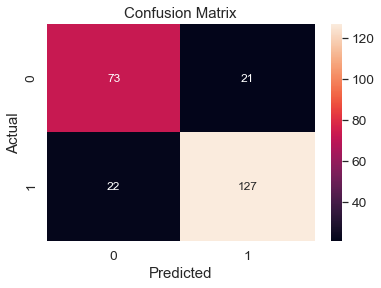

Classification Accuracy: 0.823045267489712
Classification Error: 0.17695473251028804
False Positive Rate: 0.22340425531914893
Precision: 0.8581081081081081
AUC Score: 0.8144723689847209
Cross-validated AUC: 0.9189790523216862
First 10 predicted responses:
 [1 0 1 1 1 1 0 1 0 0]
First 10 predicted probabilities of class members:
 [[0.         1.        ]
 [0.55555556 0.44444444]
 [0.37037037 0.62962963]
 [0.         1.        ]
 [0.25925926 0.74074074]
 [0.07407407 0.92592593]
 [0.59259259 0.40740741]
 [0.         1.        ]
 [1.         0.        ]
 [0.96296296 0.03703704]]
First 10 predicted probabilities:
 [[1.        ]
 [0.44444444]
 [0.62962963]
 [1.        ]
 [0.74074074]
 [0.92592593]
 [0.40740741]
 [1.        ]
 [0.        ]
 [0.03703704]]


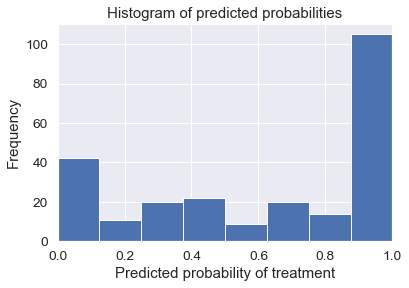

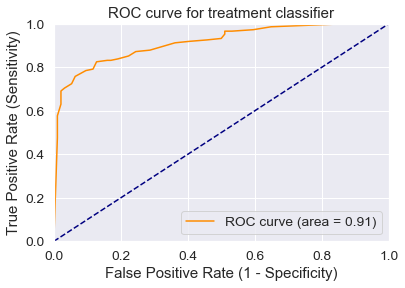

          Predicted_N  Predicted_P
Actual_N           73           21
Actual_P           22          127

inner loop: 100%|███████████████████████████████████████████████████████████████████| 1.00/1.00 [00:14<00:00, 14.4s/it]
outer loop: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:14<00:00, 14.44s/it]


In [42]:
for i in trange(1, file=sys.stdout, desc="outer loop"):
    start=get_current_datetime("%d%b%Y_%H%M%S_%f")
    start=datetime_str_parser(start,"%d%b%Y_%H%M%S_%f")
    do_something("Train KNeighbors Classifier Model")
    for j in trange(1,file=sys.stdout,leave=True,unit_scale=True, desc="inner loop"):
        score_arr=Knn()
        last_index=(len(data_records)-1)
        last_record=data_records[last_index]
        last_record.extend(score_arr)

<a id="step_4_3"></a>
#### 4.3 Decision Tree Classifier

outer loop:   0%|                                                                                | 0/1 [00:00<?, ?it/s]
inner loop:   0%|                                                                          | 0.00/1.00 [00:00<?, ?it/s]
Rand. Best Score:  0.8549382716049381

Rand. Best Params:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}
[0.852, 0.86, 0.861, 0.859, 0.859, 0.852, 0.86, 0.857, 0.849, 0.866, 0.854, 0.864, 0.865, 0.852, 0.849, 0.864, 0.867, 0.869, 0.864, 0.866]

########### Tree classifier ###############
Accuracy: 0.8395061728395061
Null accuracy:
 1    149
0     94
Name: treatment, dtype: int64
Percentage of ones: 0.6131687242798354
Percentage of zeros: 0.3868312757201646
True: [1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0]
Pred: [1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0]


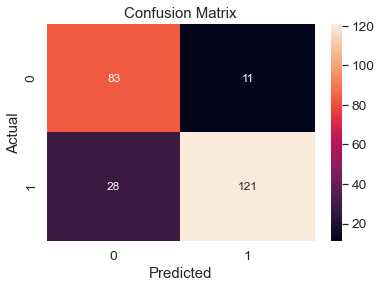

Classification Accuracy: 0.8395061728395061
Classification Error: 0.16049382716049387
False Positive Rate: 0.11702127659574468
Precision: 0.9166666666666666
AUC Score: 0.8475296301585036
Cross-validated AUC: 0.9181954671072974
First 10 predicted responses:
 [1 0 0 1 1 1 0 1 1 0]
First 10 predicted probabilities of class members:
 [[0.         1.        ]
 [0.52066116 0.47933884]
 [0.52066116 0.47933884]
 [0.         1.        ]
 [0.16129032 0.83870968]
 [0.         1.        ]
 [0.52066116 0.47933884]
 [0.         1.        ]
 [0.16129032 0.83870968]
 [0.92121212 0.07878788]]
First 10 predicted probabilities:
 [[1.        ]
 [0.47933884]
 [0.47933884]
 [1.        ]
 [0.83870968]
 [1.        ]
 [0.47933884]
 [1.        ]
 [0.83870968]
 [0.07878788]]


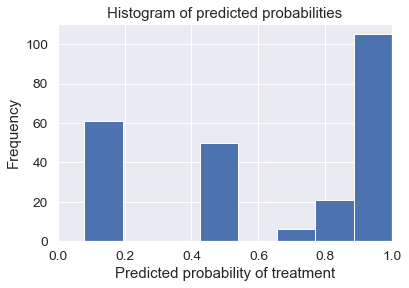

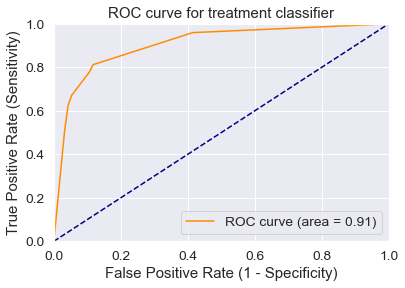

          Predicted_N  Predicted_P
Actual_N           83           11
Actual_P           28          121

inner loop: 100%|███████████████████████████████████████████████████████████████████| 1.00/1.00 [00:07<00:00, 7.81s/it]
outer loop: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.81s/it]


In [43]:
for i in trange(1, file=sys.stdout, desc="outer loop"):
    start=get_current_datetime("%d%b%Y_%H%M%S_%f")
    start=datetime_str_parser(start,"%d%b%Y_%H%M%S_%f")
    do_something("Train Decision Tree Classifier Model")
    for j in trange(1,file=sys.stdout,leave=True,unit_scale=True, desc="inner loop"):
        score_arr=treeClassifier()
        last_index=(len(data_records)-1)
        last_record=data_records[last_index]
        last_record.extend(score_arr)

<a id="step_4_4"></a>
#### 4.4 Random Forests

outer loop:   0%|                                                                                | 0/1 [00:00<?, ?it/s]
inner loop:   0%|                                                                          | 0.00/1.00 [00:00<?, ?it/s]
Rand. Best Score:  0.8660648148148148

Rand. Best Params:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}
[0.87, 0.876, 0.866, 0.871, 0.871, 0.877, 0.865, 0.869, 0.867, 0.866, 0.867, 0.869, 0.864, 0.867, 0.866, 0.867, 0.869, 0.867, 0.866, 0.864]

########### Random Forests ###############
Accuracy: 0.8518518518518519
Null accuracy:
 1    149
0     94
Name: treatment, dtype: int64
Percentage of ones: 0.6131687242798354
Percentage of zeros: 0.3868312757201646
True: [1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0]
Pred: [1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0]


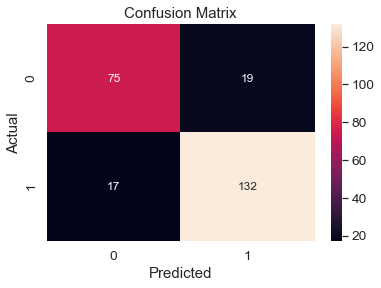

Classification Accuracy: 0.8518518518518519
Classification Error: 0.14814814814814814
False Positive Rate: 0.20212765957446807
Precision: 0.8741721854304636
AUC Score: 0.8418891903469942
Cross-validated AUC: 0.9405420998891982
First 10 predicted responses:
 [1 1 1 1 1 1 1 1 0 0]
First 10 predicted probabilities of class members:
 [[0.01887562 0.98112438]
 [0.49696817 0.50303183]
 [0.42451591 0.57548409]
 [0.00171103 0.99828897]
 [0.27636694 0.72363306]
 [0.01786211 0.98213789]
 [0.48111939 0.51888061]
 [0.00453544 0.99546456]
 [0.5733269  0.4266731 ]
 [0.9436607  0.0563393 ]]
First 10 predicted probabilities:
 [[0.98112438]
 [0.50303183]
 [0.57548409]
 [0.99828897]
 [0.72363306]
 [0.98213789]
 [0.51888061]
 [0.99546456]
 [0.4266731 ]
 [0.0563393 ]]


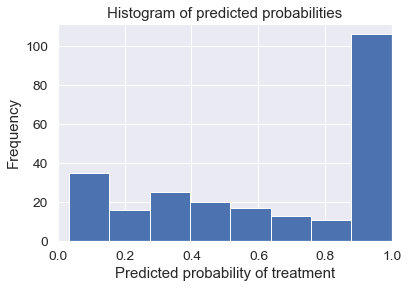

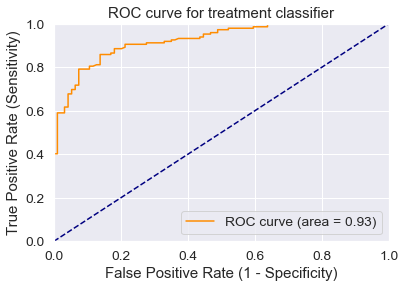

          Predicted_N  Predicted_P
Actual_N           75           19
Actual_P           17          132

inner loop: 100%|███████████████████████████████████████████████████████████████████| 1.00/1.00 [00:57<00:00, 57.5s/it]
outer loop: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:57<00:00, 57.51s/it]


In [44]:
for i in trange(1, file=sys.stdout, desc="outer loop"):
    start=get_current_datetime("%d%b%Y_%H%M%S_%f")
    start=datetime_str_parser(start,"%d%b%Y_%H%M%S_%f")
    do_something("Train Random Forests Model")
    for j in trange(1,file=sys.stdout,leave=True,unit_scale=True, desc="inner loop"):
        score_arr=randomForest()
        last_index=(len(data_records)-1)
        last_record=data_records[last_index]
        last_record.extend(score_arr)

<a id="step_4_5"></a>
#### 4.5 Bagging

outer loop:   0%|                                                                                | 0/1 [00:00<?, ?it/s]
inner loop:   0%|                                                                          | 0.00/1.00 [00:00<?, ?it/s]
########### Bagging ###############
Accuracy: 0.8189300411522634
Null accuracy:
 1    149
0     94
Name: treatment, dtype: int64
Percentage of ones: 0.6131687242798354
Percentage of zeros: 0.3868312757201646
True: [1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0]
Pred: [1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0]


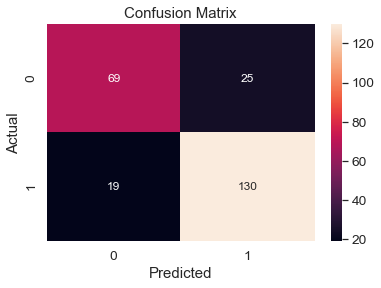

Classification Accuracy: 0.8189300411522634
Classification Error: 0.18106995884773658
False Positive Rate: 0.26595744680851063
Precision: 0.8387096774193549
AUC Score: 0.8032628873339996
Cross-validated AUC: 0.9073953421330654
First 10 predicted responses:
 [1 1 0 1 1 1 1 1 1 0]
First 10 predicted probabilities of class members:
 [[0.  1. ]
 [0.3 0.7]
 [0.7 0.3]
 [0.  1. ]
 [0.4 0.6]
 [0.  1. ]
 [0.2 0.8]
 [0.  1. ]
 [0.2 0.8]
 [1.  0. ]]
First 10 predicted probabilities:
 [[1. ]
 [0.7]
 [0.3]
 [1. ]
 [0.6]
 [1. ]
 [0.8]
 [1. ]
 [0.8]
 [0. ]]


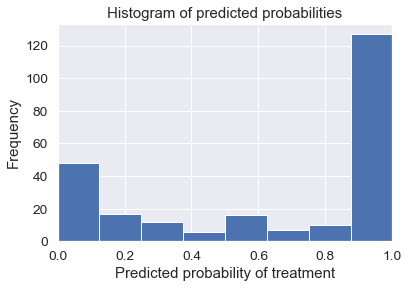

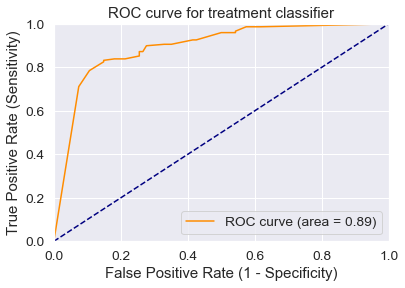

          Predicted_N  Predicted_P
Actual_N           69           25
Actual_P           19          130

inner loop: 100%|███████████████████████████████████████████████████████████████████| 1.00/1.00 [00:00<00:00, 1.30it/s]
outer loop: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]


In [45]:
for i in trange(1, file=sys.stdout, desc="outer loop"):
    start=get_current_datetime("%d%b%Y_%H%M%S_%f")
    start=datetime_str_parser(start,"%d%b%Y_%H%M%S_%f")
    do_something("Train Bagging Model")
    for j in trange(1,file=sys.stdout,leave=True,unit_scale=True, desc="inner loop"):
        score_arr=bagging()
        last_index=(len(data_records)-1)
        last_record=data_records[last_index]
        last_record.extend(score_arr)

<a id="step_4_6"></a>
#### 4.6 Boosting

outer loop:   0%|                                                                                | 0/1 [00:00<?, ?it/s]
inner loop:   0%|                                                                          | 0.00/1.00 [00:00<?, ?it/s]
########### Boosting ###############
Accuracy: 0.8518518518518519
Null accuracy:
 1    149
0     94
Name: treatment, dtype: int64
Percentage of ones: 0.6131687242798354
Percentage of zeros: 0.3868312757201646
True: [1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0]
Pred: [1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0]


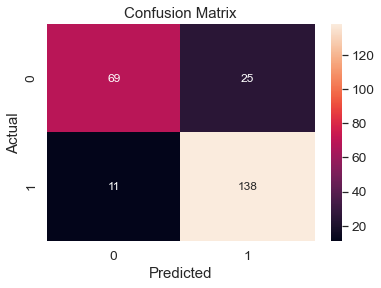

Classification Accuracy: 0.8518518518518519
Classification Error: 0.14814814814814814
False Positive Rate: 0.26595744680851063
Precision: 0.8466257668711656
AUC Score: 0.8301085249178923
Cross-validated AUC: 0.9373626652365491
First 10 predicted responses:
 [1 1 1 1 1 1 1 1 1 0]
First 10 predicted probabilities of class members:
 [[0.49715699 0.50284301]
 [0.49982736 0.50017264]
 [0.49950266 0.50049734]
 [0.49766046 0.50233954]
 [0.49910806 0.50089194]
 [0.4967741  0.5032259 ]
 [0.49937971 0.50062029]
 [0.49685697 0.50314303]
 [0.49995125 0.50004875]
 [0.50194355 0.49805645]]
First 10 predicted probabilities:
 [[0.50284301]
 [0.50017264]
 [0.50049734]
 [0.50233954]
 [0.50089194]
 [0.5032259 ]
 [0.50062029]
 [0.50314303]
 [0.50004875]
 [0.49805645]]


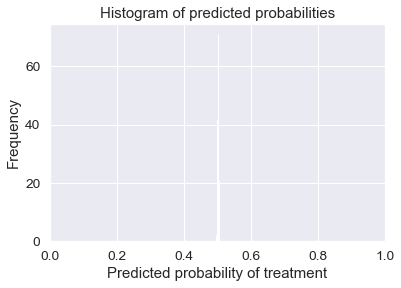

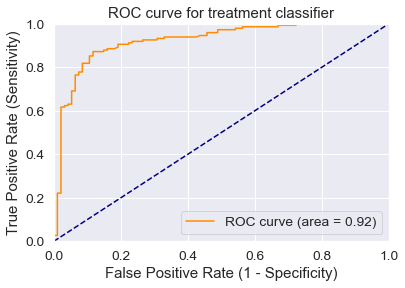

          Predicted_N  Predicted_P
Actual_N           69           25
Actual_P           11          138

inner loop: 100%|███████████████████████████████████████████████████████████████████| 1.00/1.00 [00:08<00:00, 8.33s/it]
outer loop: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.34s/it]


In [46]:
for i in trange(1, file=sys.stdout, desc="outer loop"):
    start=get_current_datetime("%d%b%Y_%H%M%S_%f")
    start=datetime_str_parser(start,"%d%b%Y_%H%M%S_%f")
    do_something("Train Boosting Model")
    for j in trange(1,file=sys.stdout,leave=True,unit_scale=True, desc="inner loop"):
        score_arr=boosting()
        last_index=(len(data_records)-1)
        last_record=data_records[last_index]
        last_record.extend(score_arr)

<a id="step_4_7"></a>
#### 4.7 Stacking

outer loop:   0%|                                                                                | 0/1 [00:00<?, ?it/s]
inner loop:   0%|                                                                          | 0.00/1.00 [00:00<?, ?it/s]
########### Stacking ###############
Accuracy: 0.8271604938271605
Null accuracy:
 1    149
0     94
Name: treatment, dtype: int64
Percentage of ones: 0.6131687242798354
Percentage of zeros: 0.3868312757201646
True: [1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0]
Pred: [1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0]


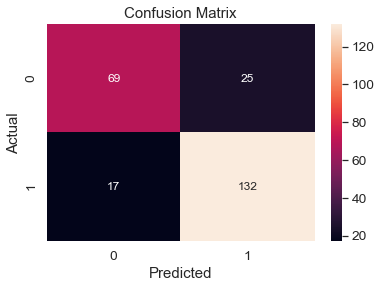

Classification Accuracy: 0.8271604938271605
Classification Error: 0.1728395061728395
False Positive Rate: 0.26595744680851063
Precision: 0.8407643312101911
AUC Score: 0.8099742967299729
Cross-validated AUC: 0.8960135072021232
First 10 predicted responses:
 [1 1 0 1 1 1 1 1 0 0]
First 10 predicted probabilities of class members:
 [[0.01181999 0.98818001]
 [0.01181999 0.98818001]
 [0.9663426  0.0336574 ]
 [0.01181999 0.98818001]
 [0.01181999 0.98818001]
 [0.01181999 0.98818001]
 [0.04186764 0.95813236]
 [0.01181999 0.98818001]
 [0.9663426  0.0336574 ]
 [0.9663426  0.0336574 ]]
First 10 predicted probabilities:
 [[0.98818001]
 [0.98818001]
 [0.0336574 ]
 [0.98818001]
 [0.98818001]
 [0.98818001]
 [0.95813236]
 [0.98818001]
 [0.0336574 ]
 [0.0336574 ]]


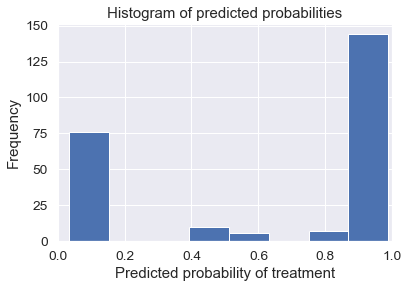

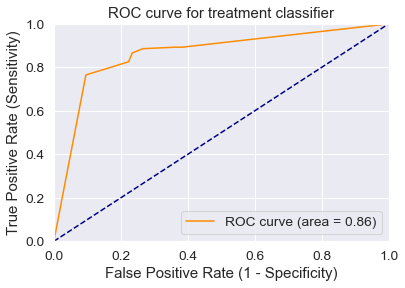

          Predicted_N  Predicted_P
Actual_N           69           25
Actual_P           17          132

inner loop: 100%|███████████████████████████████████████████████████████████████████| 1.00/1.00 [00:02<00:00, 2.73s/it]
outer loop: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.74s/it]


In [47]:
for i in trange(1, file=sys.stdout, desc="outer loop"):
    start=get_current_datetime("%d%b%Y_%H%M%S_%f")
    start=datetime_str_parser(start,"%d%b%Y_%H%M%S_%f")
    do_something("Train Stacking Model")
    for j in trange(1,file=sys.stdout,leave=True,unit_scale=True, desc="inner loop"):
        score_arr=stacking()
        last_index=(len(data_records)-1)
        last_record=data_records[last_index]
        last_record.extend(score_arr)

In [48]:
data=pd.DataFrame(data_records,columns=["description","timestamp",
                                        "classification_accuracy","classification_error",
                                        "false_positive_rate","precision_score",
                                        "auc_score","cross_validated_auc_score","time_elapsed"])

print("\n########### OUTPUT TRAINING LOGS ###############")
display(HTML(data.to_html()))


########### OUTPUT TRAINING LOGS ###############


,description,timestamp,classification_accuracy,classification_error,false_positive_rate,precision_score,auc_score,cross_validated_auc_score,time_elapsed
0,Train Logistic Regression Model,17Jan2021_170539_341099,0.835391,0.164609,0.265957,0.842767,0.816686,0.922521,0 days 00:00:00.700765
1,Train KNeighbors Classifier Model,17Jan2021_170540_057851,0.823045,0.176955,0.223404,0.858108,0.814472,0.918979,0 days 00:00:14.440124
2,Train Decision Tree Classifier Model,17Jan2021_170554_509293,0.839506,0.160494,0.117021,0.916667,0.847530,0.918195,0 days 00:00:07.805912
3,Train Random Forests Model,17Jan2021_170602_331170,0.851852,0.148148,0.202128,0.874172,0.841889,0.940542,0 days 00:00:57.507944
4,Train Bagging Model,17Jan2021_170659_853441,0.818930,0.181070,0.265957,0.838710,0.803263,0.907395,0 days 00:00:00.753073
5,Train Boosting Model,17Jan2021_170700_631252,0.851852,0.148148,0.265957,0.846626,0.830109,0.937363,0 days 00:00:08.340709
6,Train Stacking Model,17Jan2021_170708_987956,0.827160,0.172840,0.265957,0.840764,0.809974,0.896014,0 days 00:00:02.740425


<a id='step_5'></a>
### Step 5. Evaluation


########### Part 4. MODEL EVALUATION ###############


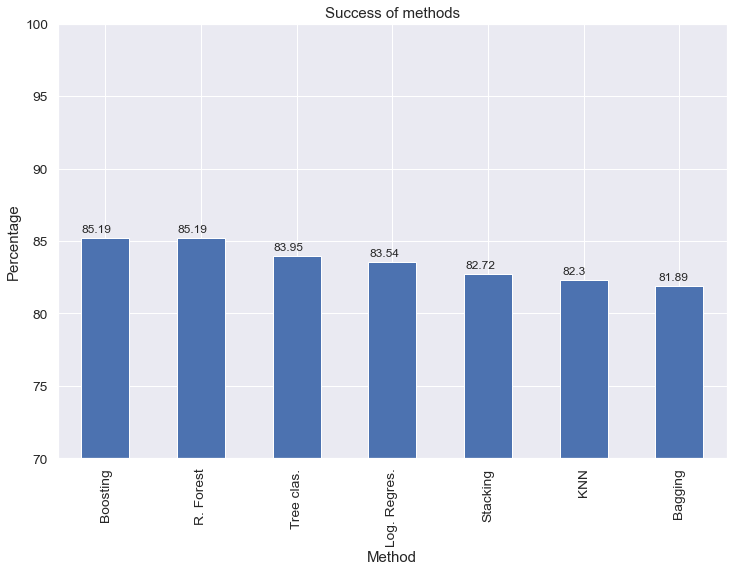

Boosting model of accuracy 85.18518518518519% has been saved to output/model.pkl


In [49]:
import pickle
print("\n########### Part 4. MODEL EVALUATION ###############")
s=pd.Series(method_dict)
s=s.sort_values(ascending=False)

plt.figure(figsize=(12,8))
ax = s.plot(kind="bar") 
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylim([70.0, 100.0])
plt.xlabel("Method")
plt.ylabel("Percentage")
plt.title("Success of methods")
plt.show()
    
model_scores=pd.DataFrame(s,columns=["Accuracy Score %"])
winner=model_scores.index[0]
winner_score=method_dict[winner]
filename = "output/model.pkl"
model=rmse_dict[winner]
pickle.dump(model, open(filename, "wb"))
print(winner+" model of accuracy "+str(winner_score)+"% has been saved to "+filename)

In [50]:
with open("input/all_labels_df.json", "w") as outfile:  
    json.dump(all_labels_df, outfile)
with open("input/all_encoded_labels_df.json", "w") as outfile2:  
    json.dump(all_encoded_labels_df, outfile2)
with open("input/X_test.json", "w") as outfile3: 
    json.dump(list(X_test.columns), outfile3)

<a id="step_6"></a>
### Step 6. Predictions
#### Refer to: <a href="Model_Predictions.ipynb" target="blank">Input file</a> or head to <a href="https://mindful-predictions.herokuapp.com/" target="blank">Web App</a>